In [2]:
from MasalaPipe.masala_pipe import MasalaPipe

In [3]:
import pandas as pd
import random
import numpy as np
import pickle
import optuna

%load_ext lab_black

# Base

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=7,
    class_sep=0.005,
    weights=[0.8, 0.2],
    random_state=42,
)
values = np.concatenate([X, y.reshape(y.shape[0], 1)], axis=1)
df = pd.DataFrame(values)
df.rename(columns={20: "target"}, inplace=True)
target = "target"
features = df.drop(target, axis=1).columns.tolist()
new_features_names = ["feature_" + str(col) for col in features]
df.rename(columns=dict(zip(features, new_features_names)), inplace=True)
df["id"] = list(range(len(df)))
df["sexo"] = df.id.apply(lambda x: random.choice(["male", "female"]))
df["flag"] = 1
df["feature_0_quadrado"] = df.feature_0 * 2
new_features_names.append("sexo")
new_features_names.append("flag")
new_features_names.append("feature_0_quadrado")

In [5]:
df.target.value_counts(1)

0.0    0.798
1.0    0.202
Name: target, dtype: float64

In [6]:
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      1.077301  -0.707595   0.678210   0.670586   0.794743  -1.751290   
1     -0.352767  -2.322796  -0.043831   0.118850  -0.317879  -1.680328   
2      0.553951   0.944585   1.658302  -2.322010  -1.508970  -1.311032   
3      0.762636  -0.384591  -1.352593  -0.258236   2.808188  -1.441181   
4      1.374850   0.050602   0.711631  -3.249957  -2.018832   0.508823   
...         ...        ...        ...        ...        ...        ...   
9995   0.079691   0.640846   0.245455   1.621108   0.540830  -0.385189   
9996  -1.766461  -0.788547   0.565828   1.723365   4.125363   0.607424   
9997  -1.027103  -0.879103   0.986316  -0.368261  -0.732537   0.833850   
9998   0.268245   0.164609  -0.761470   0.603339   0.894497   0.501703   
9999   0.788386  -1.028250  -1.846590  -1.039434   1.272494  -0.677757   

      feature_6  feature_7  feature_8  feature_9  ...  feature_15  feature_16  \
0     -0.499997   0.637988  -0.781136  -2.077345  ...   -1.042373    0.319686   
1     -1.670819   0.138880   0.512154   1.013965  ...    0.357206   -1.797987   
2     -0.290192  -2.213958  -0.122647  -1.762152  ...    0.750400    0.327263   
3     -0.339987  -1.679992   0.494028  -0.528619  ...   -0.630704   -0.527440   
4     -1.304655  -0.856369  -0.148498   0.083531  ...    0.971234   -3.165175   
...         ...        ...        ...        ...  ...         ...         ...   
9995  -0.402383   0.917311  -0.144254   2.091406  ...   -0.266183    0.226792   
9996  -0.840028   0.321803   0.241378  -1.228371  ...    0.111880    2.694532   
9997   0.397189   1.921453   1.826775   2.087327  ...   -0.182912    1.625540   
9998  -0.438662   1.112737  -1.729377  -0.803894  ...    0.050664    1.417493   
9999  -2.252882  -1.054380  -1.085761   0.242475  ...   -0.656808   -0.895653   

      feature_17  feature_18  feature_19  target    id    sexo  flag  \
0       0.814599   -1.776792    0.629725     0.0     0  female     1   
1      -2.591136    1.586175   -1.957941     0.0     1  female     1   
2      -0.044651    4.389106    2.105709     0.0     2  female     1   
3       0.543313   -0.956506    1.580110     0.0     3  female     1   
4      -0.067064    3.782833   -2.908821     0.0     4    male     1   
...          ...         ...         ...     ...   ...     ...   ...   
9995    0.236823   -0.294695    0.349862     0.0  9995    male     1   
9996   -0.514383   -2.975866    3.349600     0.0  9996    male     1   
9997    0.164717   -3.951094    0.219977     0.0  9997  female     1   
9998   -1.973245   -1.701644    0.483901     0.0  9998    male     1   
9999    0.870252    1.130281    1.268121     0.0  9999    male     1   

      feature_0_quadrado  
0               2.154601  
1              -0.705535  
2               1.107901  
3               1.525271  
4               2.749701  
...                  ...  
9995            0.159382  
9996           -3.532922  
9997           -2.054206  
9998            0.536490  
9999            1.576771  

[10000 rows x 25 columns]

## Testando eval features

[13:19:50] |Preprocess| total constant features dropped: 1                                       ]8;id=561796;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=96378;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#454\454]8;;\

           |Preprocess| total correlated features dropped: 1                                     ]8;id=263664;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=438372;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#472\472]8;;\

           --> Parameters select                                                                 ]8;id=496971;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=209518;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#116\116]8;;\

|Iteration 1| New parameters found - AUC of 0.7193 (0.7081)

|Iteration 9| New parameters found - AUC of 0.7378 (0.7268)

selected parameters: {'learning_rate': 0.03125299105181354, 'n_estimators': 500, 'num_leaves': 10, 'max_depth': 6, 
'min_child_samples': 120, 'min_child_weight': 100.86546231999621, 'boosting_type': 'gbdt', 'objective': 'binary', 
'colsample_bytree': 0.45331806929136503, 'subsample': 0.6189451203087998, 'min_split_gain': 0.06761176681211536}

[13:21:20] --> Fit model                                                                         ]8;id=372888;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=582268;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#153\153]8;;\

           --> Performance                                                                       ]8;id=59221;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=184579;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#173\173]8;;\

AUC train: 0.8486

AUC test: 0.7866

KS train: 52.59

KS test: 41.92

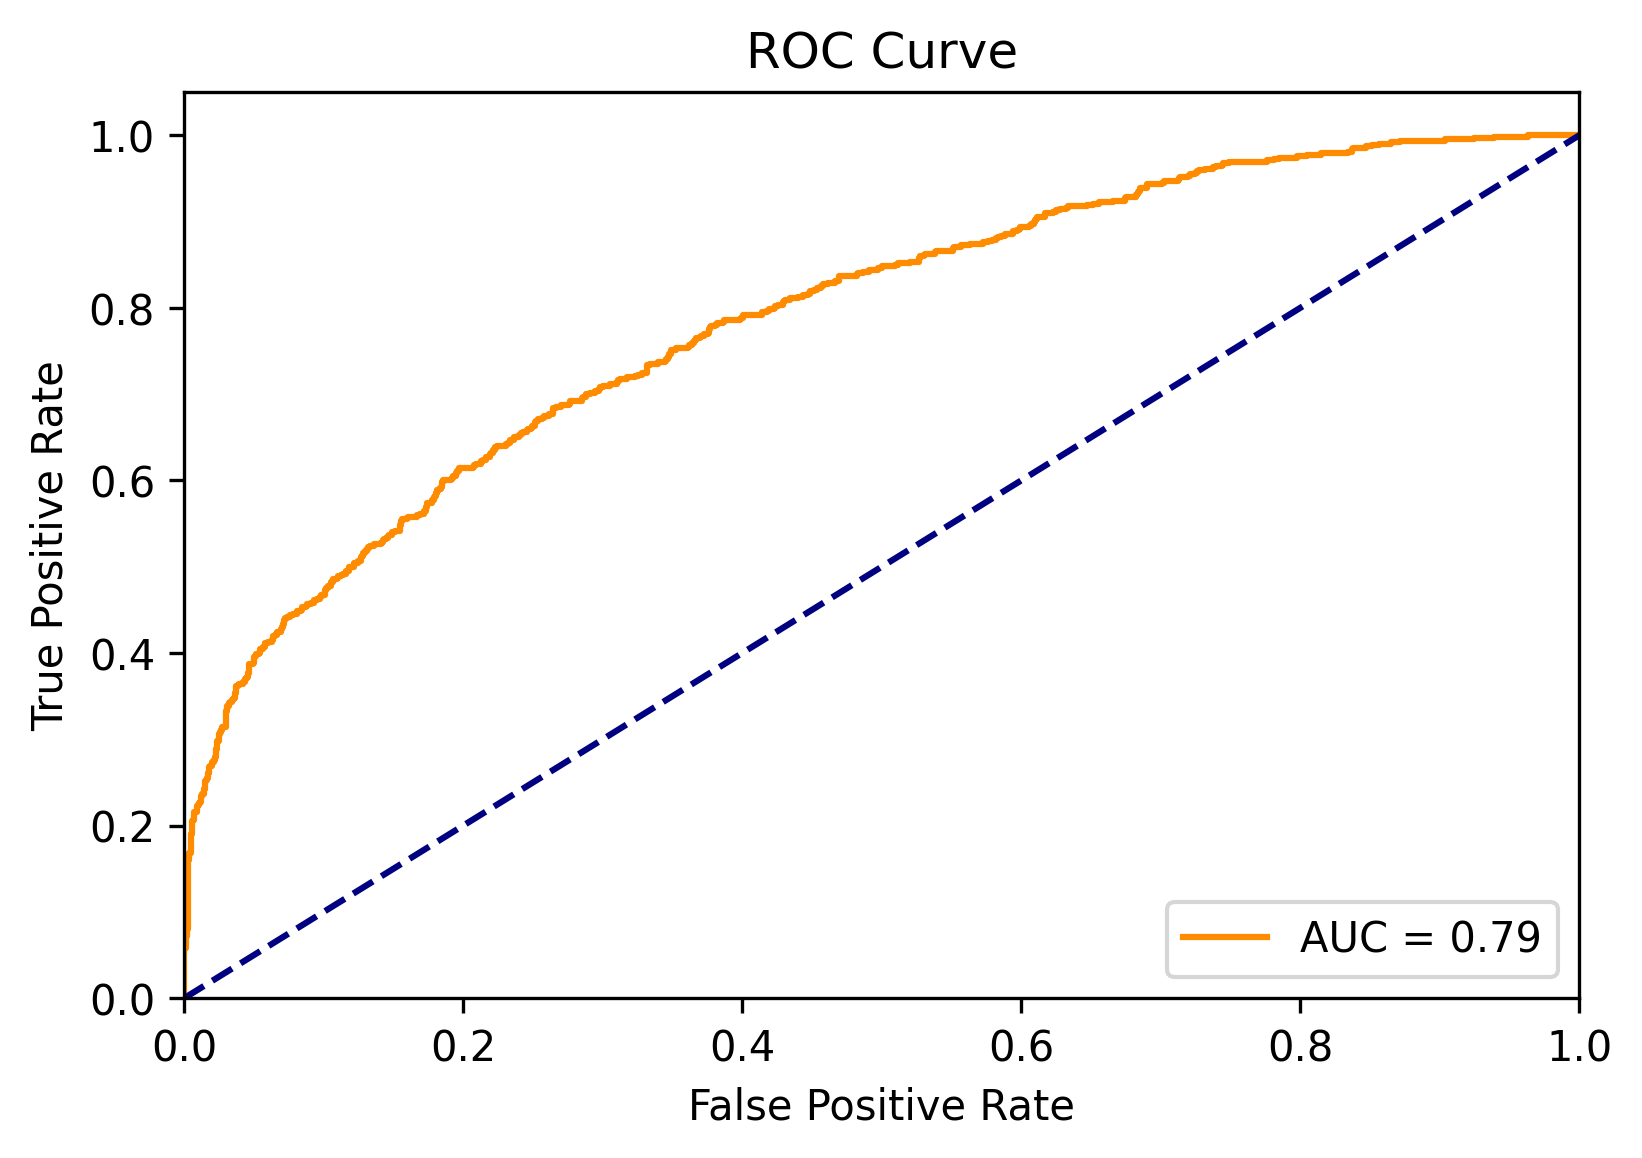

           --> Feature Importance                                                                ]8;id=880401;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=32128;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#191\191]8;;\

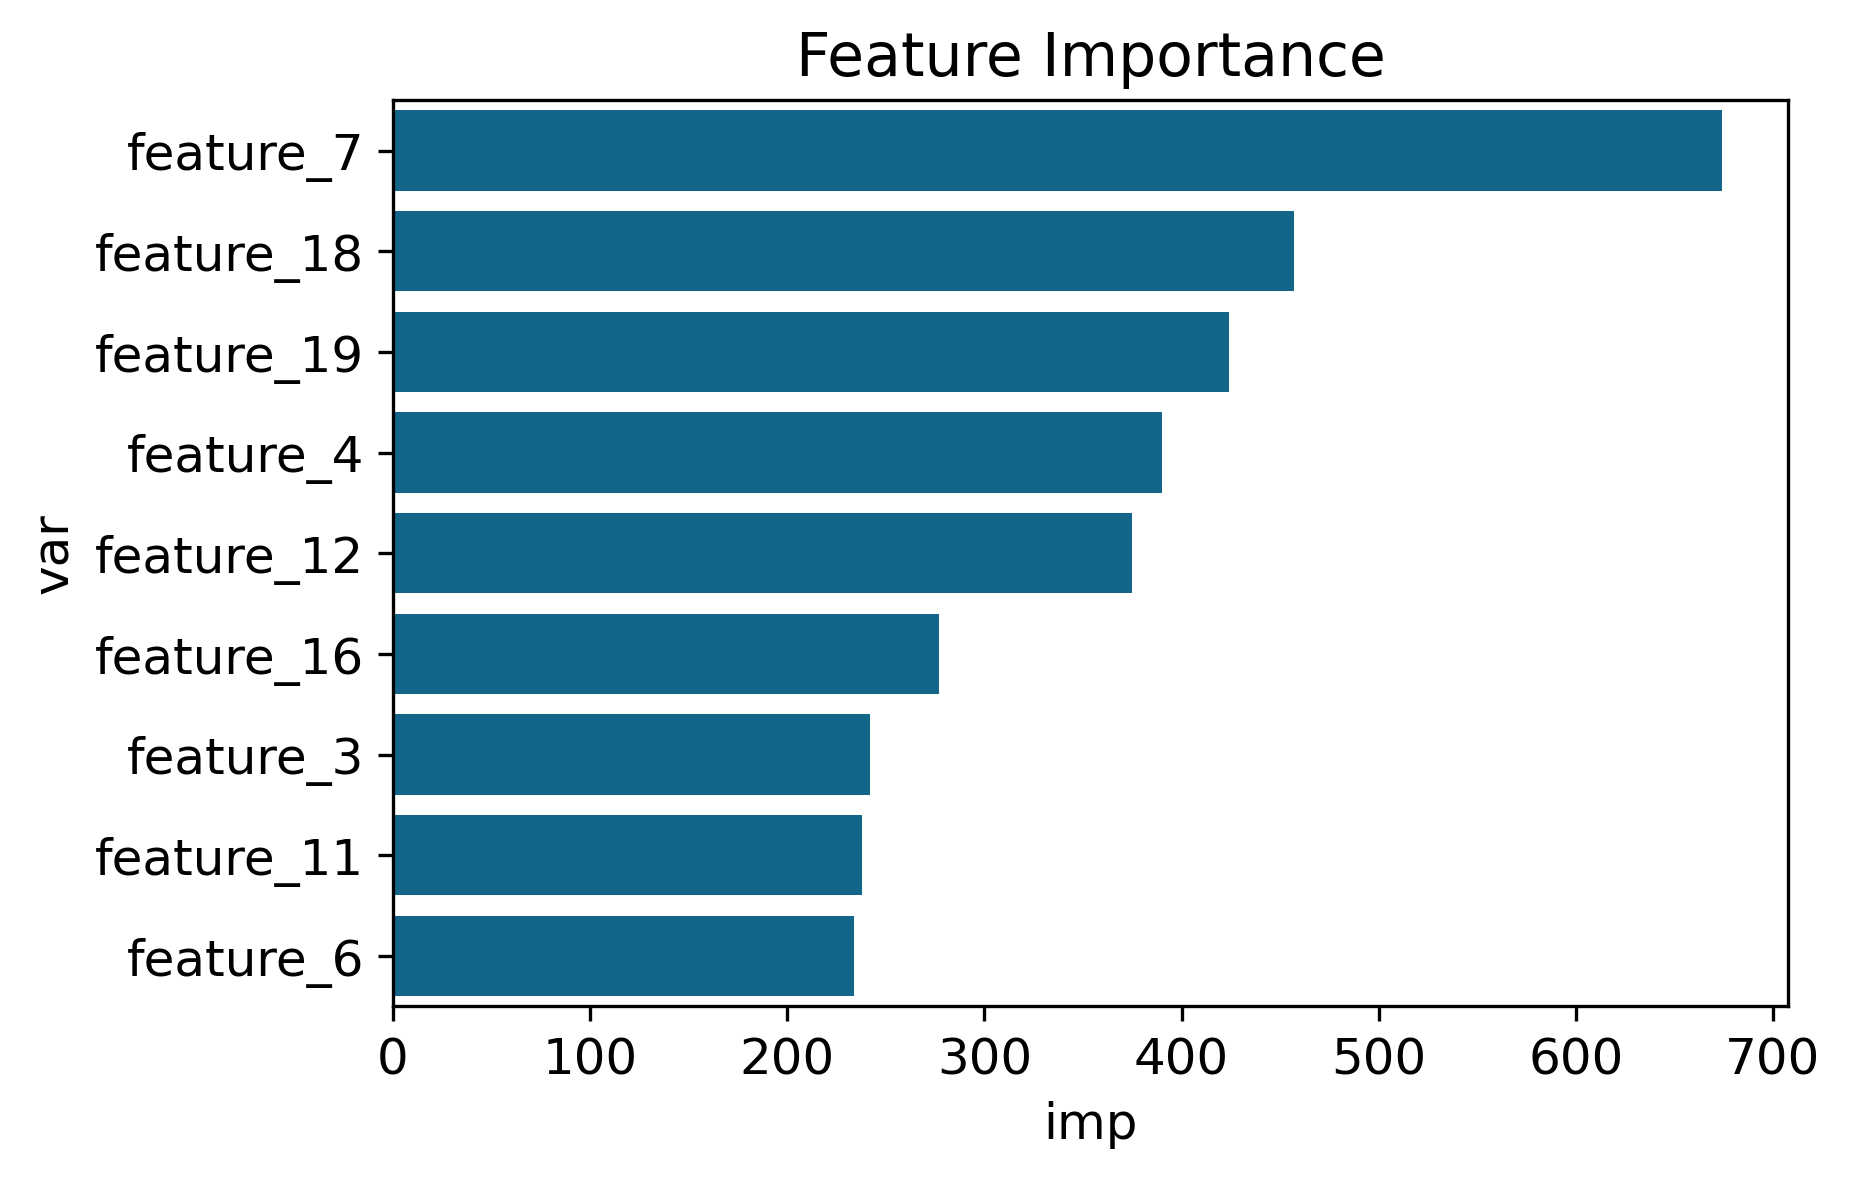

[13:21:21] --> Shap Explainer                                                                    ]8;id=289735;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=130558;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#200\200]8;;\

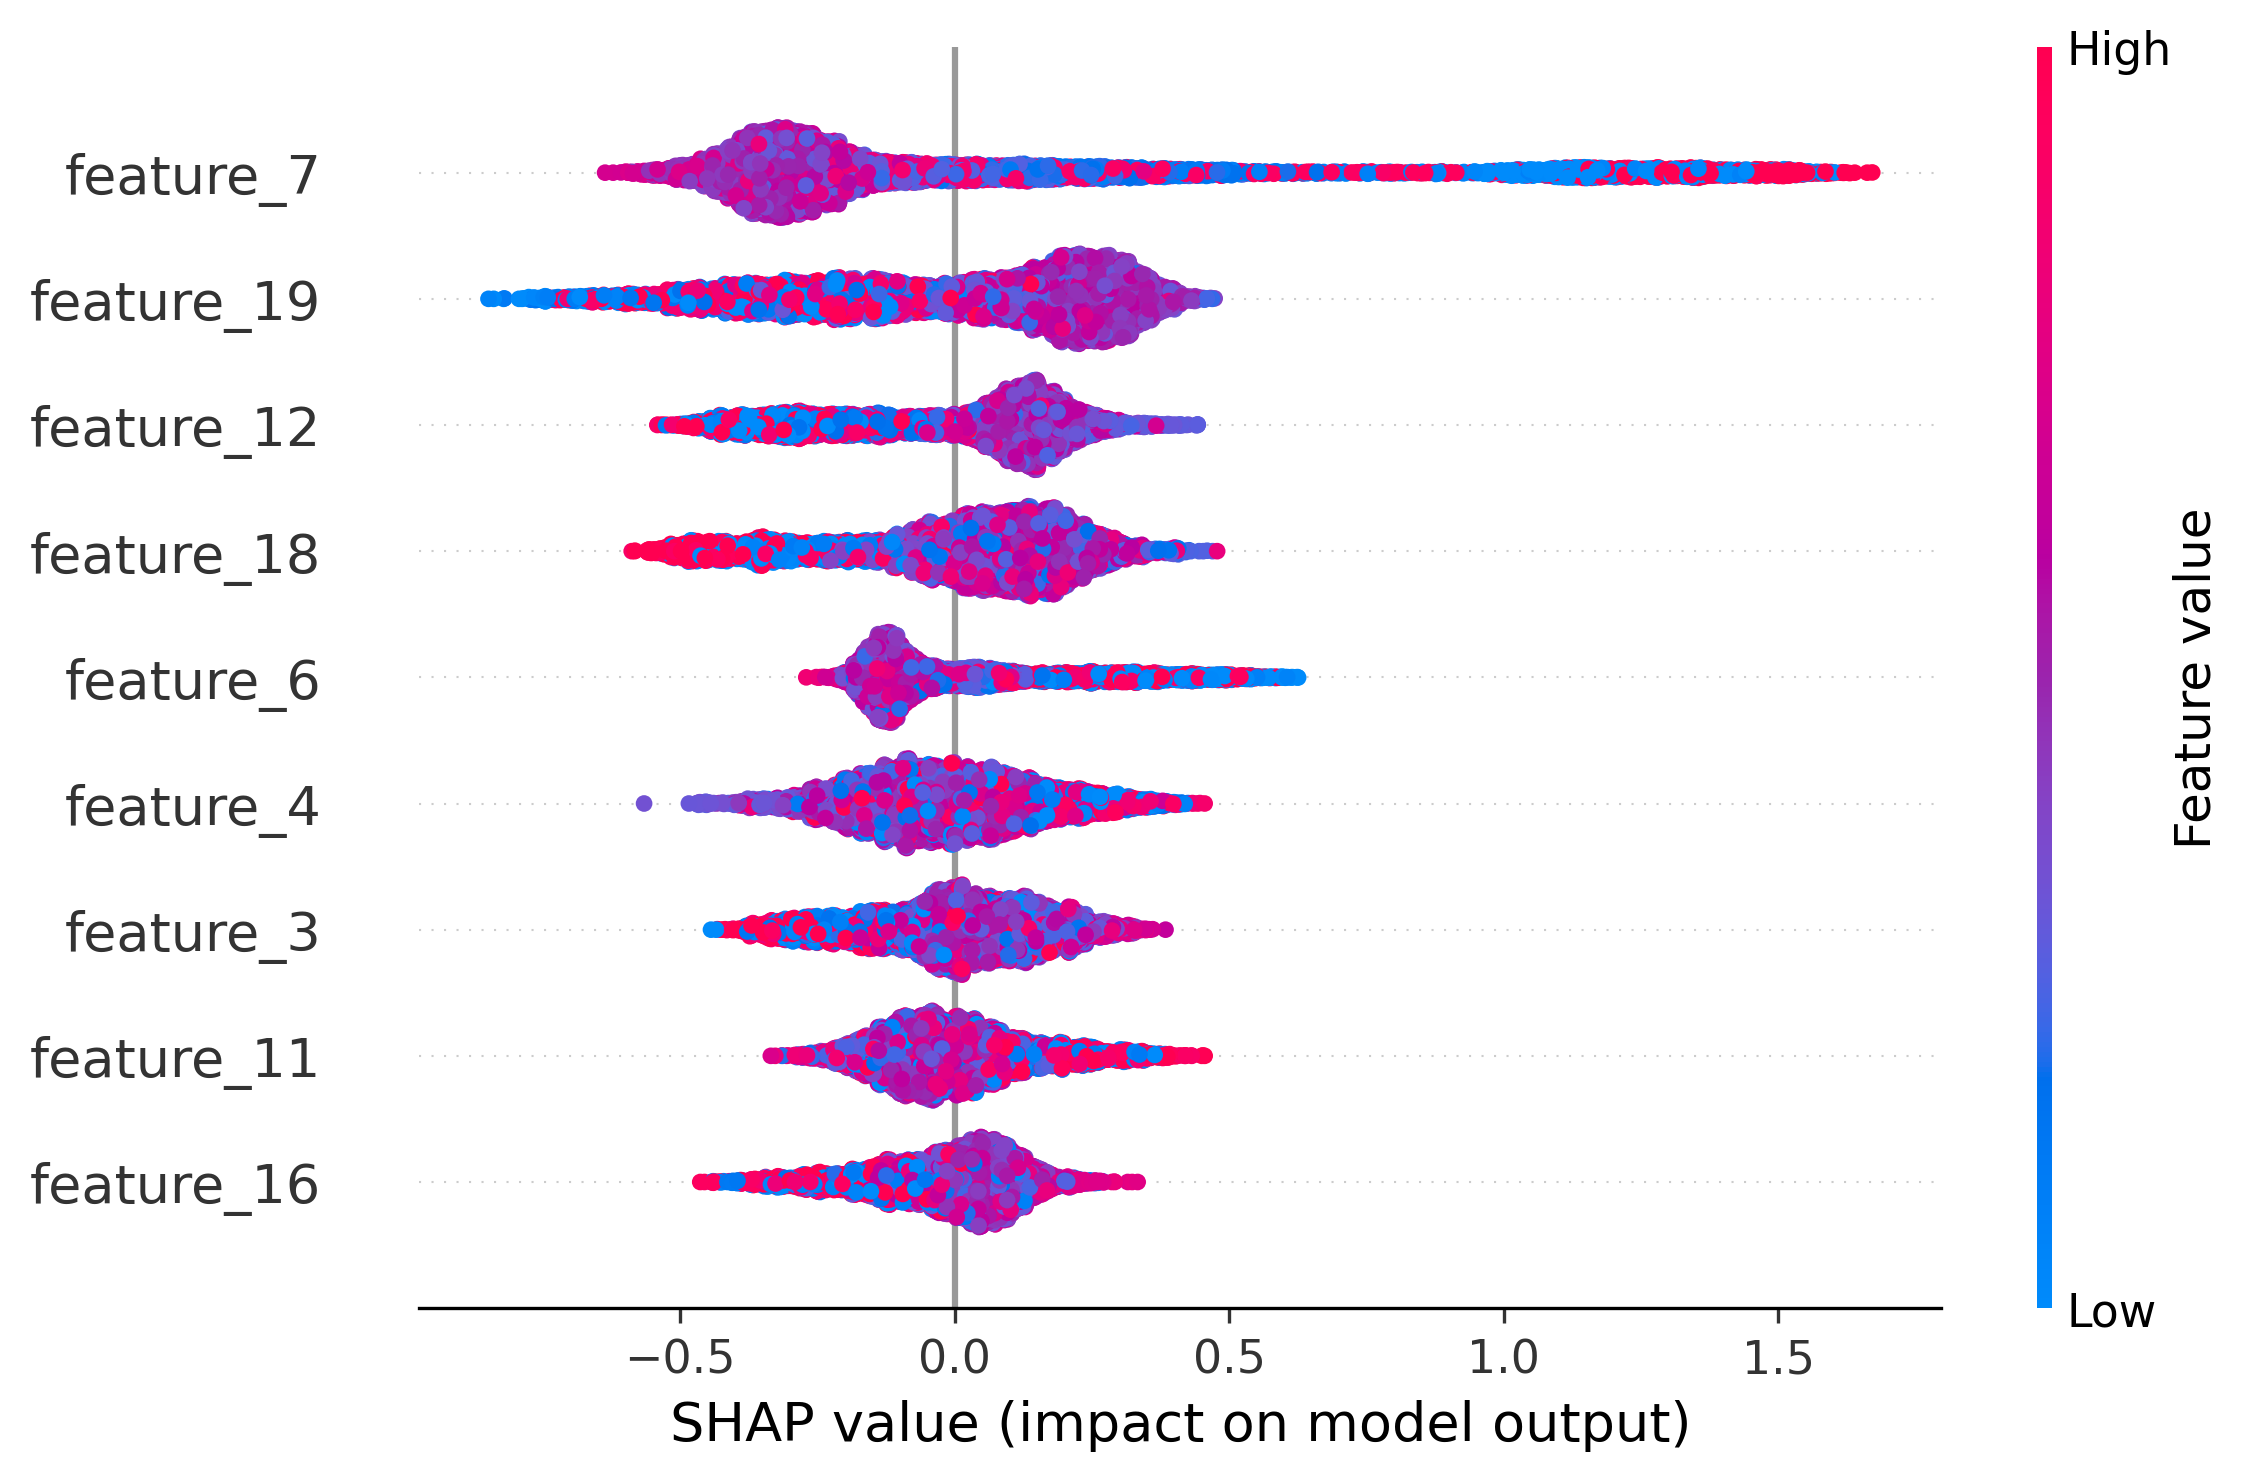

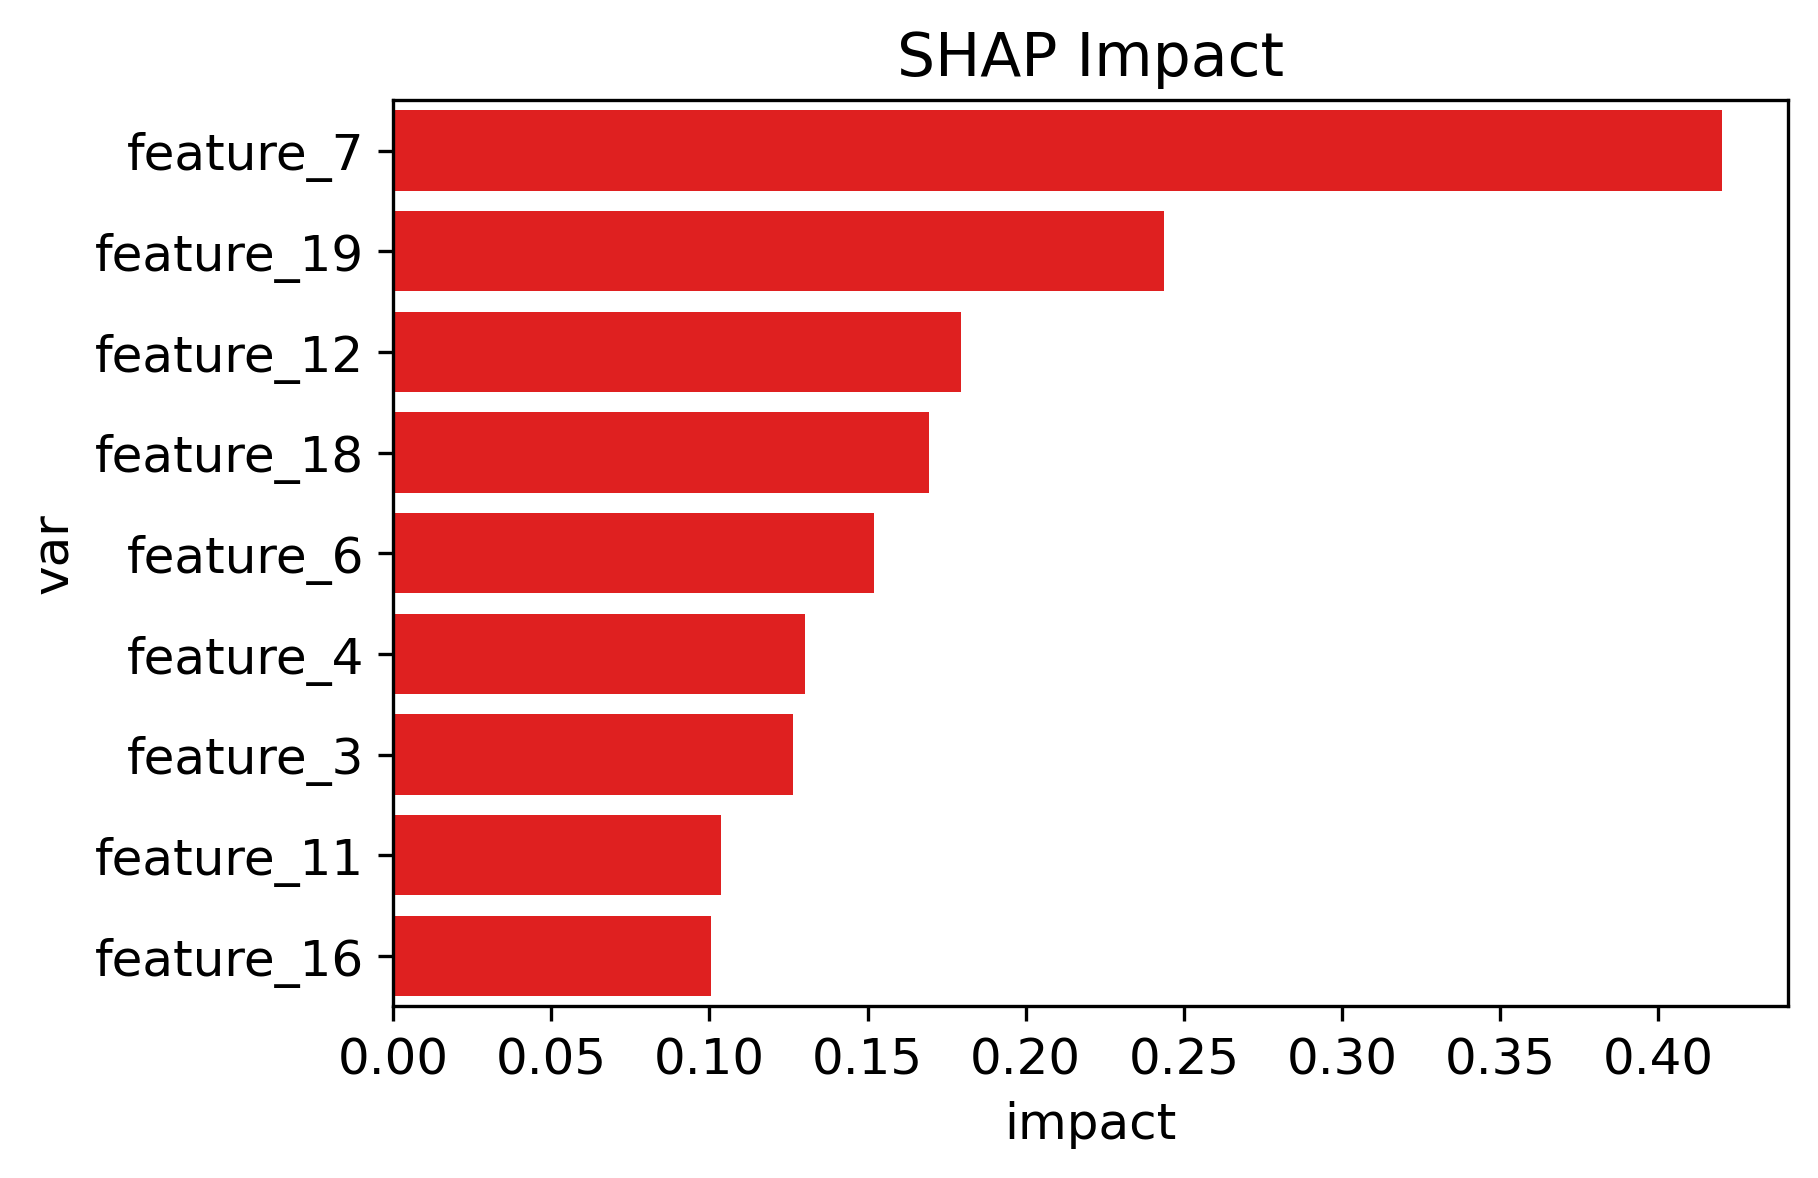

In [7]:
model_ = MasalaPipe(
    data=df,
    id_label="id",
    features=new_features_names,
    target=target,
    categorical_features=["sexo", "flag"],
    col_safra=None,
    test_size=0.3,
    niter=25,
    metric_eval="AUC",
    metric_method="default",
    thr_train_test=0.07,
    correlation_tol=0.85,
    constant_tol=0.95,
    early_stopping_rounds=10,
    eval_features=True,
    filename_storage="eval_features_true",
    save_in_txt=False,
    rank_count=True,
    params_test=None,
)
model_.preprocess()
model_.run_pipe()

In [8]:
model_.features

['feature_3',
 'feature_4',
 'feature_6',
 'feature_7',
 'feature_11',
 'feature_12',
 'feature_16',
 'feature_18',
 'feature_19']

In [9]:
model_.correlated_features

['feature_0']

In [10]:
model_.constant_features

['flag']

In [11]:
model_.categorical_features

[]

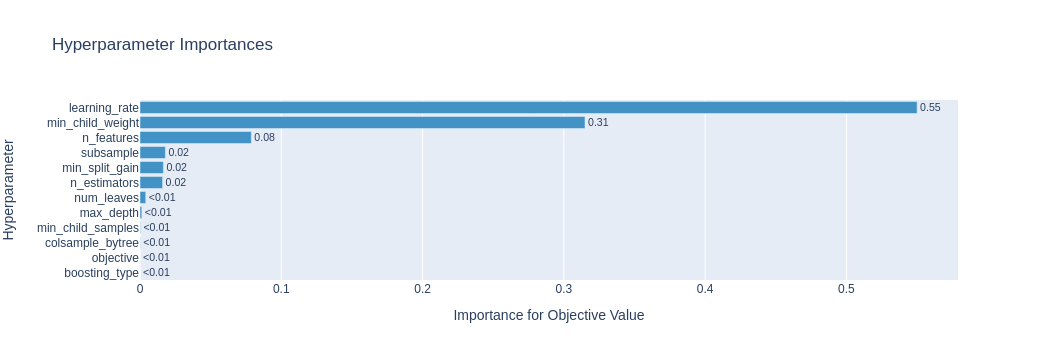

In [12]:
optuna.visualization.plot_param_importances(model_.study)

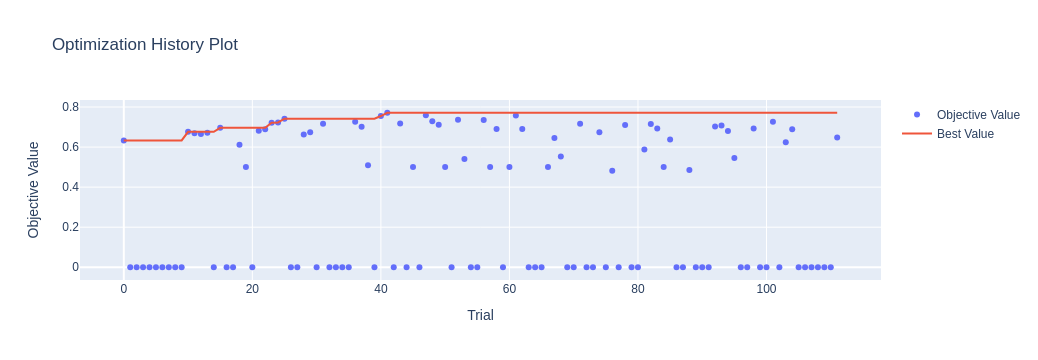

In [13]:
optuna.visualization.plot_optimization_history(model_.study)

In [14]:
model_.params

{'learning_rate': 0.03125299105181354,
 'n_estimators': 500,
 'num_leaves': 10,
 'max_depth': 6,
 'min_child_samples': 120,
 'min_child_weight': 100.86546231999621,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'colsample_bytree': 0.45331806929136503,
 'subsample': 0.6189451203087998,
 'min_split_gain': 0.06761176681211536}

In [15]:
model_.X_train

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
9069   0.312093  -0.961393  -0.553734   2.231034  -0.271666   0.340208   
2603  -0.200685   1.406599   0.867769   1.566562   2.195044   0.582735   
7738  -1.179214   1.109666   0.726555  -0.173834   2.066241  -0.735436   
1579  -1.101171   1.132671  -0.202127  -0.642492  -2.206125  -0.613378   
5058  -0.866404  -0.829971   1.989073   0.115058   0.542364   0.726821   
...         ...        ...        ...        ...        ...        ...   
5734  -0.654651   0.194290  -0.402775   0.455043  -1.136869  -1.637566   
5191   2.648325   0.415171   1.696564  -0.234744  -0.177788  -0.467312   
5390   0.458236  -1.365279  -0.748579   0.607817   0.707733  -0.237194   
860    1.929161   0.813075   0.276471   1.432791   2.278589   1.738724   
7270  -0.900348  -1.149246  -0.794049  -1.378551   1.433565   1.282585   

      feature_6  feature_7  feature_8  feature_9  ...  feature_15  feature_16  \
9069  -0.079344   3.284631   0.884849  -0.662552  ...   -1.580663    1.188420   
2603   0.945035  -1.964223  -0.689126   1.666090  ...    1.098782   -1.083676   
7738  -1.343873   0.300608  -0.360801  -0.685114  ...    0.143415   -0.612090   
1579  -0.813253   0.320239   1.613881  -2.484703  ...    0.057038   -1.726283   
5058   0.476584  -2.247902  -0.104647  -0.680606  ...    2.128628   -0.579948   
...         ...        ...        ...        ...  ...         ...         ...   
5734   2.976466  -1.230922  -0.021988  -1.038087  ...    0.036965    1.383299   
5191   1.115743  -1.057116   0.331916   0.748311  ...   -0.207428    0.403061   
5390   2.343316   1.772737  -1.023159   1.350225  ...    0.070794    1.437660   
860   -1.685466   2.761025  -0.705739   1.127980  ...   -0.501635    2.337855   
7270   1.774327  -3.342911  -0.847354   0.308839  ...   -0.436750   -0.642011   

      feature_17  feature_18  feature_19  target    id    sexo  flag  \
9069    2.062535   -2.595174   -0.421213     1.0  9069  female     1   
2603    0.532680   -3.586080    2.867915     0.0  2603  female     1   
7738    2.173694    0.383190   -0.783025     1.0  7738    male     1   
1579    0.810070    1.641047   -1.192017     0.0  1579  female     1   
5058   -0.584356    0.813496    1.549379     0.0  5058  female     1   
...          ...         ...         ...     ...   ...     ...   ...   
5734   -1.604519   -0.484398    0.992786     0.0  5734    male     1   
5191    0.736490   -0.604364    0.917337     0.0  5191  female     1   
5390    0.317422   -3.320080   -1.519166     1.0  5390    male     1   
860     1.054002   -1.540063   -0.247446     0.0   860    male     1   
7270   -2.487398   -1.532203    0.259153     1.0  7270    male     1   

      feature_0_quadrado  
9069            0.624187  
2603           -0.401369  
7738           -2.358428  
1579           -2.202342  
5058           -1.732808  
...                  ...  
5734           -1.309302  
5191            5.296650  
5390            0.916472  
860             3.858321  
7270           -1.800696  

[7000 rows x 25 columns]

In [16]:
model_.X_test

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
6252   0.729538  -0.707482   0.054980  -1.430058  -0.555815  -0.712807   
4684  -0.296505  -0.532186  -1.242865   0.393729  -1.691999  -1.640300   
1731  -1.258708  -1.127408   1.860568  -2.224211   0.182959  -0.392139   
4742  -1.298359  -0.581307   0.534850   0.660250  -0.001147  -0.539579   
4521   0.087656   1.781539   1.593844   0.549334   1.391228  -0.421660   
...         ...        ...        ...        ...        ...        ...   
8014  -0.233720   2.468414  -0.742645   0.658496  -0.406283   1.906706   
1074   0.340087  -0.905715  -0.489397  -0.149846  -1.494950   0.281013   
3063  -1.604746   0.638921  -1.411573  -1.338772   0.837144  -0.896484   
6487   0.643161   1.560999   0.476146  -1.252062  -2.934775  -1.235517   
4705  -0.854022  -0.668579   0.402686   1.053187  -0.929101  -1.909856   

      feature_6  feature_7  feature_8  feature_9  ...  feature_15  feature_16  \
6252  -0.450922  -0.466842   1.260066   1.145113  ...    1.525276    0.578275   
4684   0.984233  -1.180396   1.027859  -0.209990  ...   -2.423799   -0.408586   
1731  -0.196410  -2.621075  -1.223052   0.315978  ...   -0.141537   -3.472345   
4742  -0.344434   0.990221  -0.144557  -0.077483  ...   -1.675682   -0.601062   
4521   1.718827   0.127948   0.073000   1.448984  ...    0.195916    3.027062   
...         ...        ...        ...        ...  ...         ...         ...   
8014   2.025772  -1.734426  -0.260167  -0.554946  ...    0.658565   -2.069670   
1074   1.284100  -0.695634  -0.029075   0.220813  ...   -0.195423    0.479964   
3063  -1.469872  -2.962041  -2.232741  -0.198663  ...   -2.551239   -2.018419   
6487   1.016198  -0.332644   0.769792  -1.881260  ...    0.000325    0.222517   
4705   1.348390  -0.553439  -0.319271  -0.727979  ...    0.625735   -0.098942   

      feature_17  feature_18  feature_19  target    id    sexo  flag  \
6252    0.865235    0.626827    0.728467     0.0  6252    male     1   
4684    1.171944    2.611429    0.118550     0.0  4684  female     1   
1731    0.347379    2.659209   -1.160731     0.0  1731  female     1   
4742    0.508398   -0.202247   -1.042681     0.0  4742    male     1   
4521    1.096385   -2.374024    1.095779     0.0  4521    male     1   
...          ...         ...         ...     ...   ...     ...   ...   
8014    0.111761   -1.818733    0.345153     0.0  8014    male     1   
1074    0.114448    3.357392    0.804708     0.0  1074    male     1   
3063   -1.317851    3.539343    2.253126     1.0  3063  female     1   
6487    0.000358    2.363927   -0.727797     0.0  6487    male     1   
4705    0.283073   -0.452596   -0.302363     0.0  4705  female     1   

      feature_0_quadrado  
6252            1.459075  
4684           -0.593010  
1731           -2.517416  
4742           -2.596718  
4521            0.175313  
...                  ...  
8014           -0.467441  
1074            0.680173  
3063           -3.209492  
6487            1.286321  
4705           -1.708044  

[3000 rows x 25 columns]

## Testando seleção de features

In [18]:
model_ = MasalaPipe(
    data=df,
    id_label="id",
    features=new_features_names,
    target=target,
    categorical_features=["sexo", "flag"],
    col_safra=None,
    test_size=0.3,
    niter=20,
    metric_eval="AUC",
    metric_method="default",
    thr_train_test=0.07,
    correlation_tol=0.85,
    constant_tol=0.95,
    early_stopping_rounds=10,
    eval_features=False,
    filename_storage="eval_features_false",
    save_in_txt=False,
    rank_count=True,
    params_test=None,
)
print(model_.features)
model_.preprocess()
model_.mrmr_features_select(k=15)
model_.features

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'sexo', 'flag', 'feature_0_quadrado']


[22:39:56] |Preprocess| total constant features dropped: 1                                       ]8;id=316494;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=532687;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#454\454]8;;\

[22:39:57] |Preprocess| total correlated features dropped: 1                                     ]8;id=673638;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=696519;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#472\472]8;;\

           |Features select| MRMR                                                                ]8;id=659949;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=903093;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#238\238]8;;\

100%|██████████| 15/15 [00:02<00:00,  6.39it/s]


['feature_1',
 'feature_2',
 'feature_6',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_17',
 'feature_18',
 'feature_19',
 'sexo',
 'feature_0_quadrado']

In [19]:
model_.borutashap_features_select()
model_.features

[22:40:19] |Features select| BorutaShap                                                          ]8;id=572374;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=294161;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#252\252]8;;\

  0%|          | 0/100 [00:00<?, ?it/s]

4 attributes confirmed important: ['feature_6', 'feature_18', 'feature_19', 'feature_11']
11 attributes confirmed unimportant: ['feature_9', 'feature_17', 'feature_2', 'sexo', 'feature_0_quadrado', 'feature_8', 'feature_1', 'feature_10', 'feature_14', 'feature_15', 'feature_13']
0 tentative attributes remains: []


Total selected features in BorutaShap 4

['feature_6', 'feature_11', 'feature_18', 'feature_19']

[22:41:37] --> Parameters select                                                                 ]8;id=297245;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=46057;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#116\116]8;;\

|Iteration 8| New parameters found - AUC of 0.6526 (0.6331)

|Iteration 13| New parameters found - AUC of 0.6626 (0.6436)

|Iteration 14| New parameters found - AUC of 0.6698 (0.6488)

selected parameters: {'learning_rate': 0.018882759291175985, 'n_estimators': 300, 'num_leaves': 11, 'max_depth': 9,
'min_child_samples': 420, 'min_child_weight': 4.5881026137266225, 'boosting_type': 'gbdt', 'objective': 'binary', 
'colsample_bytree': 0.8309739932773642, 'subsample': 0.6098936448040793, 'min_split_gain': 0.013797231221701723}

[22:42:34] --> Fit model                                                                         ]8;id=616501;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=131437;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#153\153]8;;\

           --> Performance                                                                       ]8;id=765414;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=46814;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#173\173]8;;\

AUC train: 0.7345

AUC test: 0.6673

KS train: 34.41

KS test: 24.40

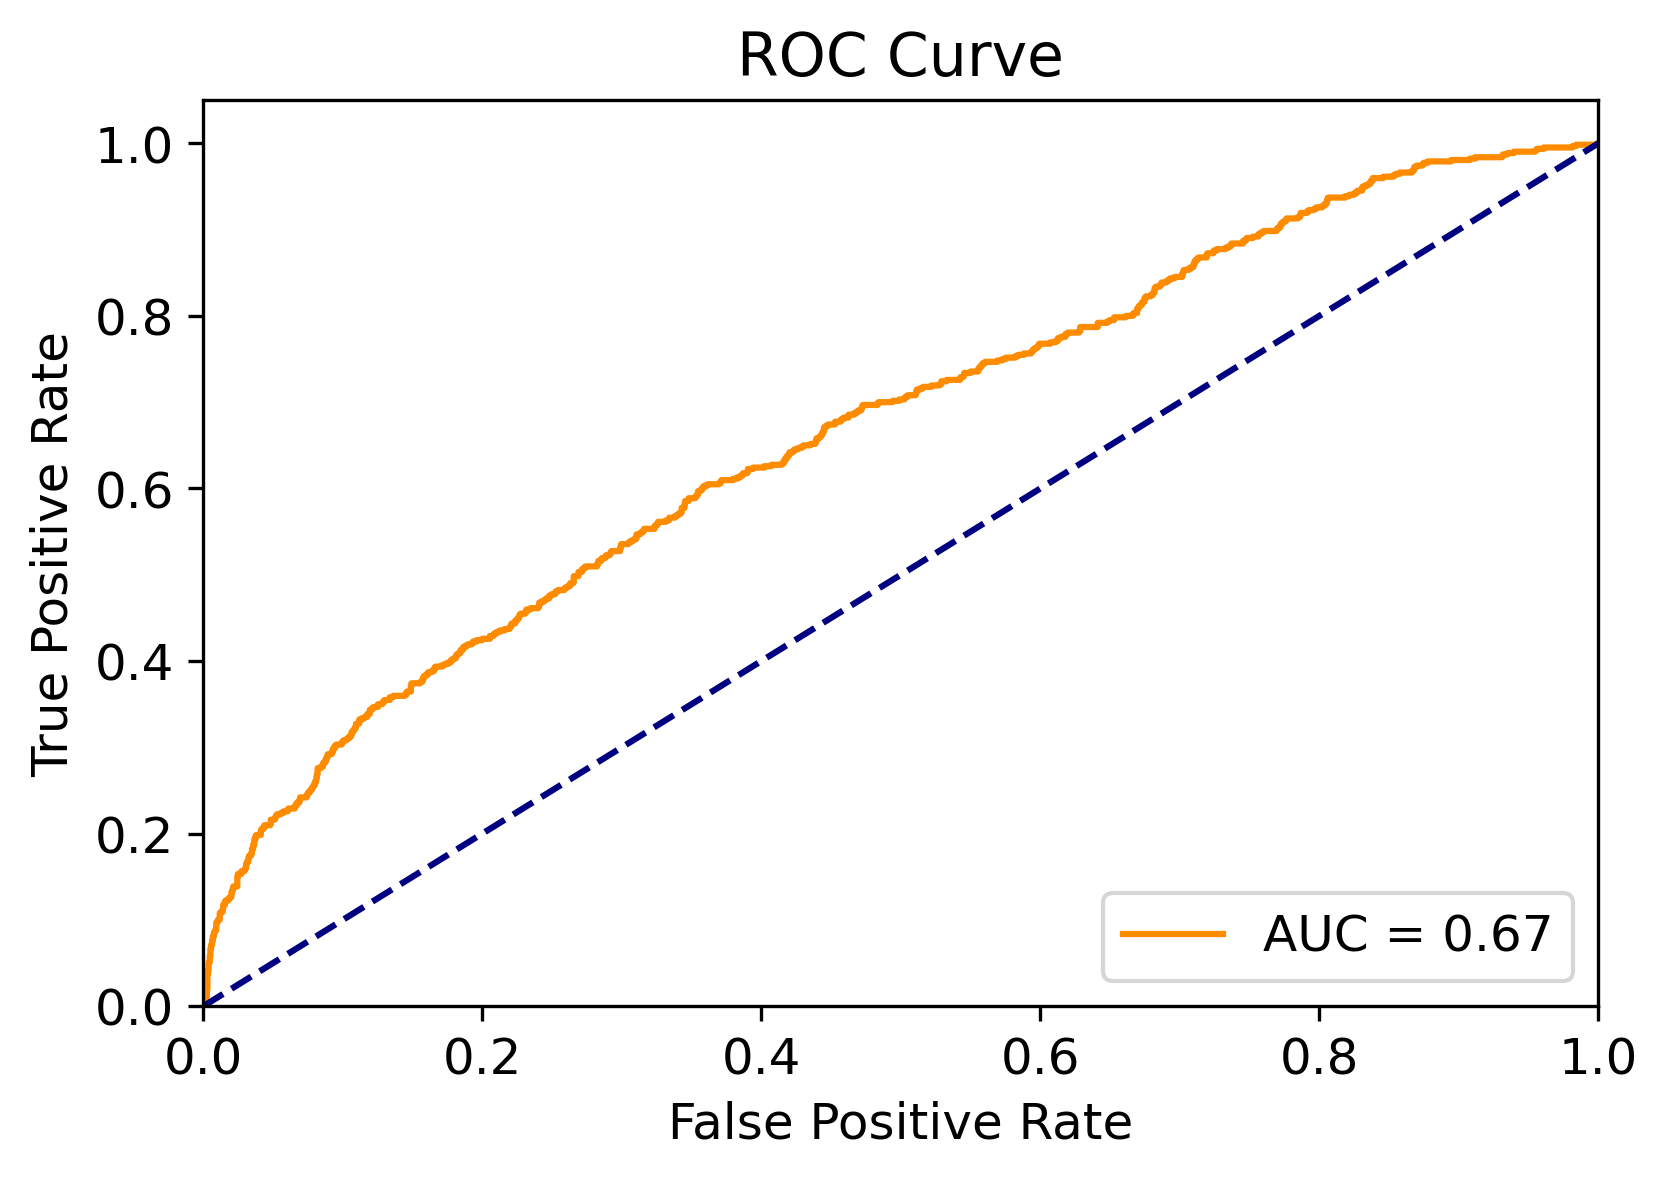

           --> Feature Importance                                                                ]8;id=319912;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=349118;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#191\191]8;;\

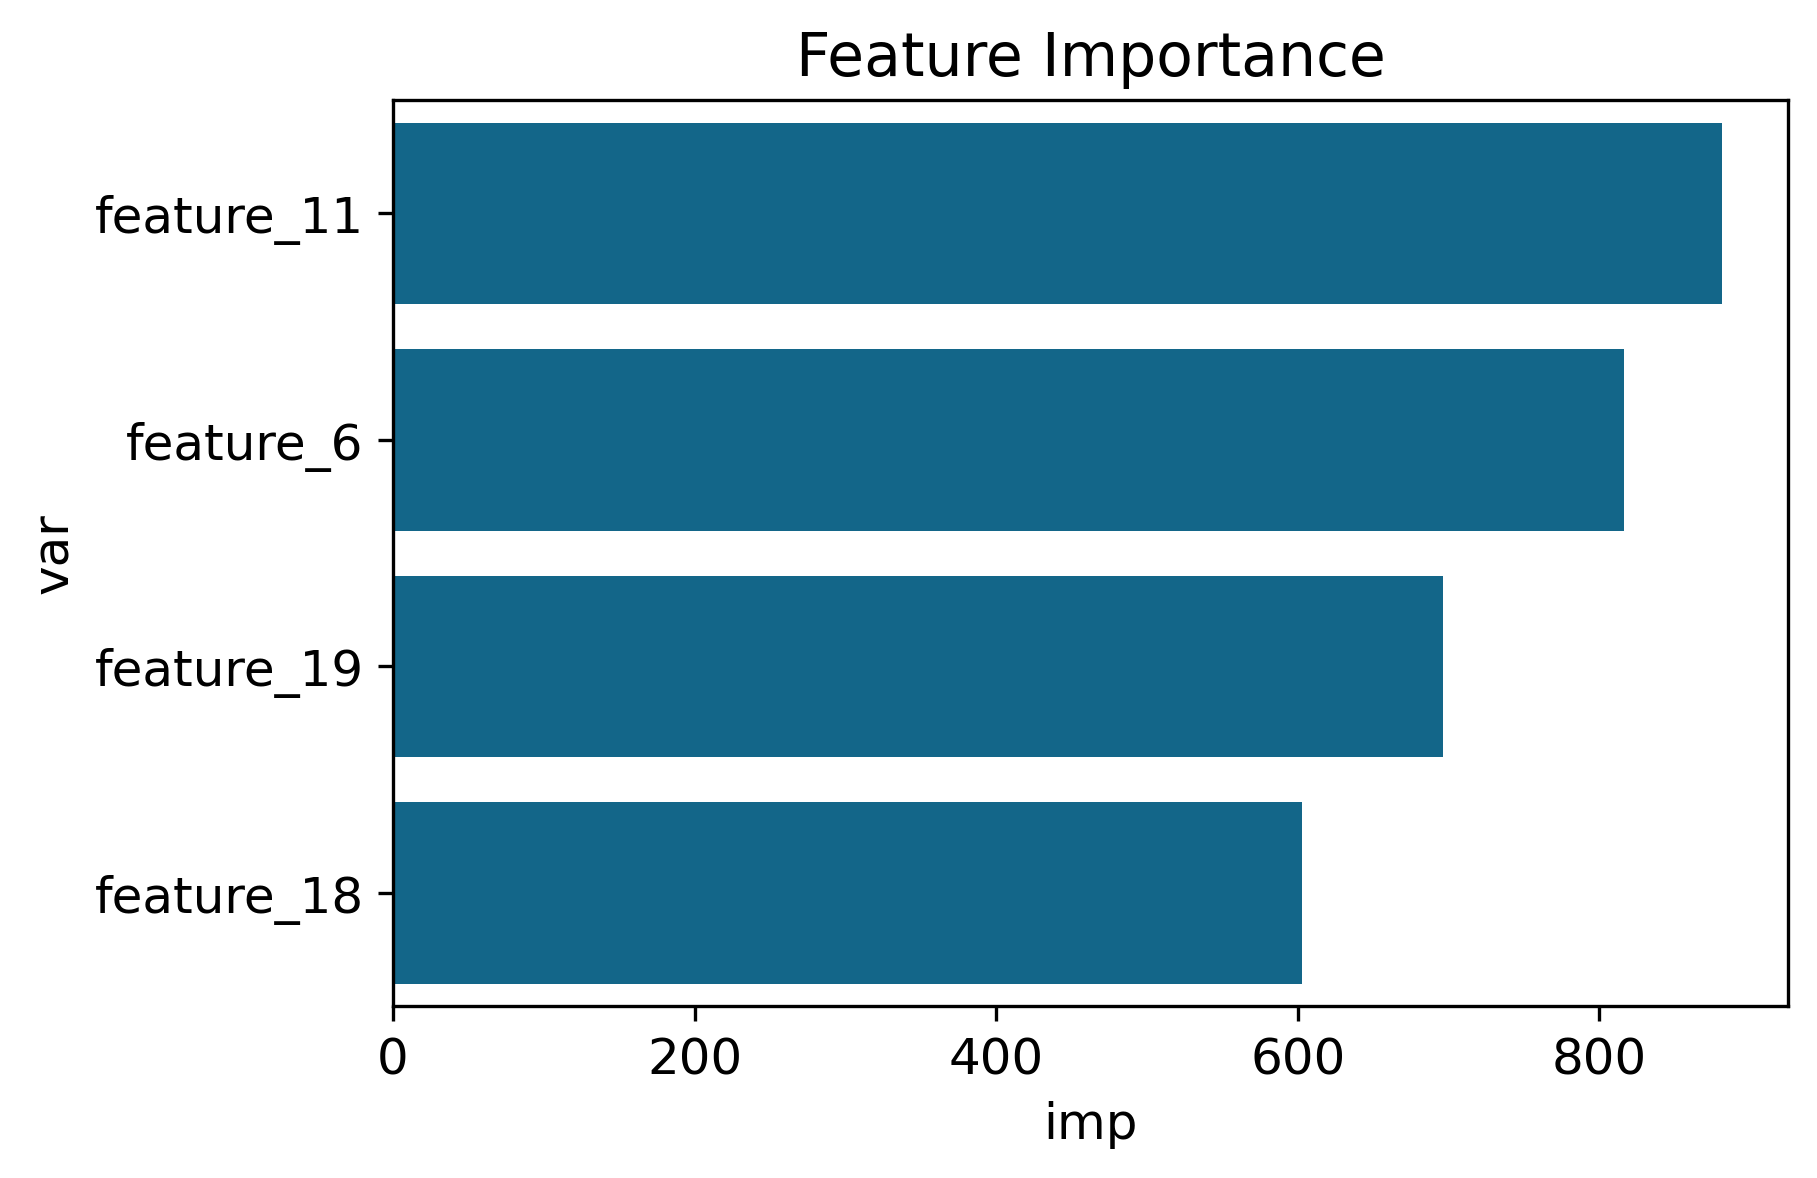

[22:42:35] --> Shap Explainer                                                                    ]8;id=275093;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=709188;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#200\200]8;;\

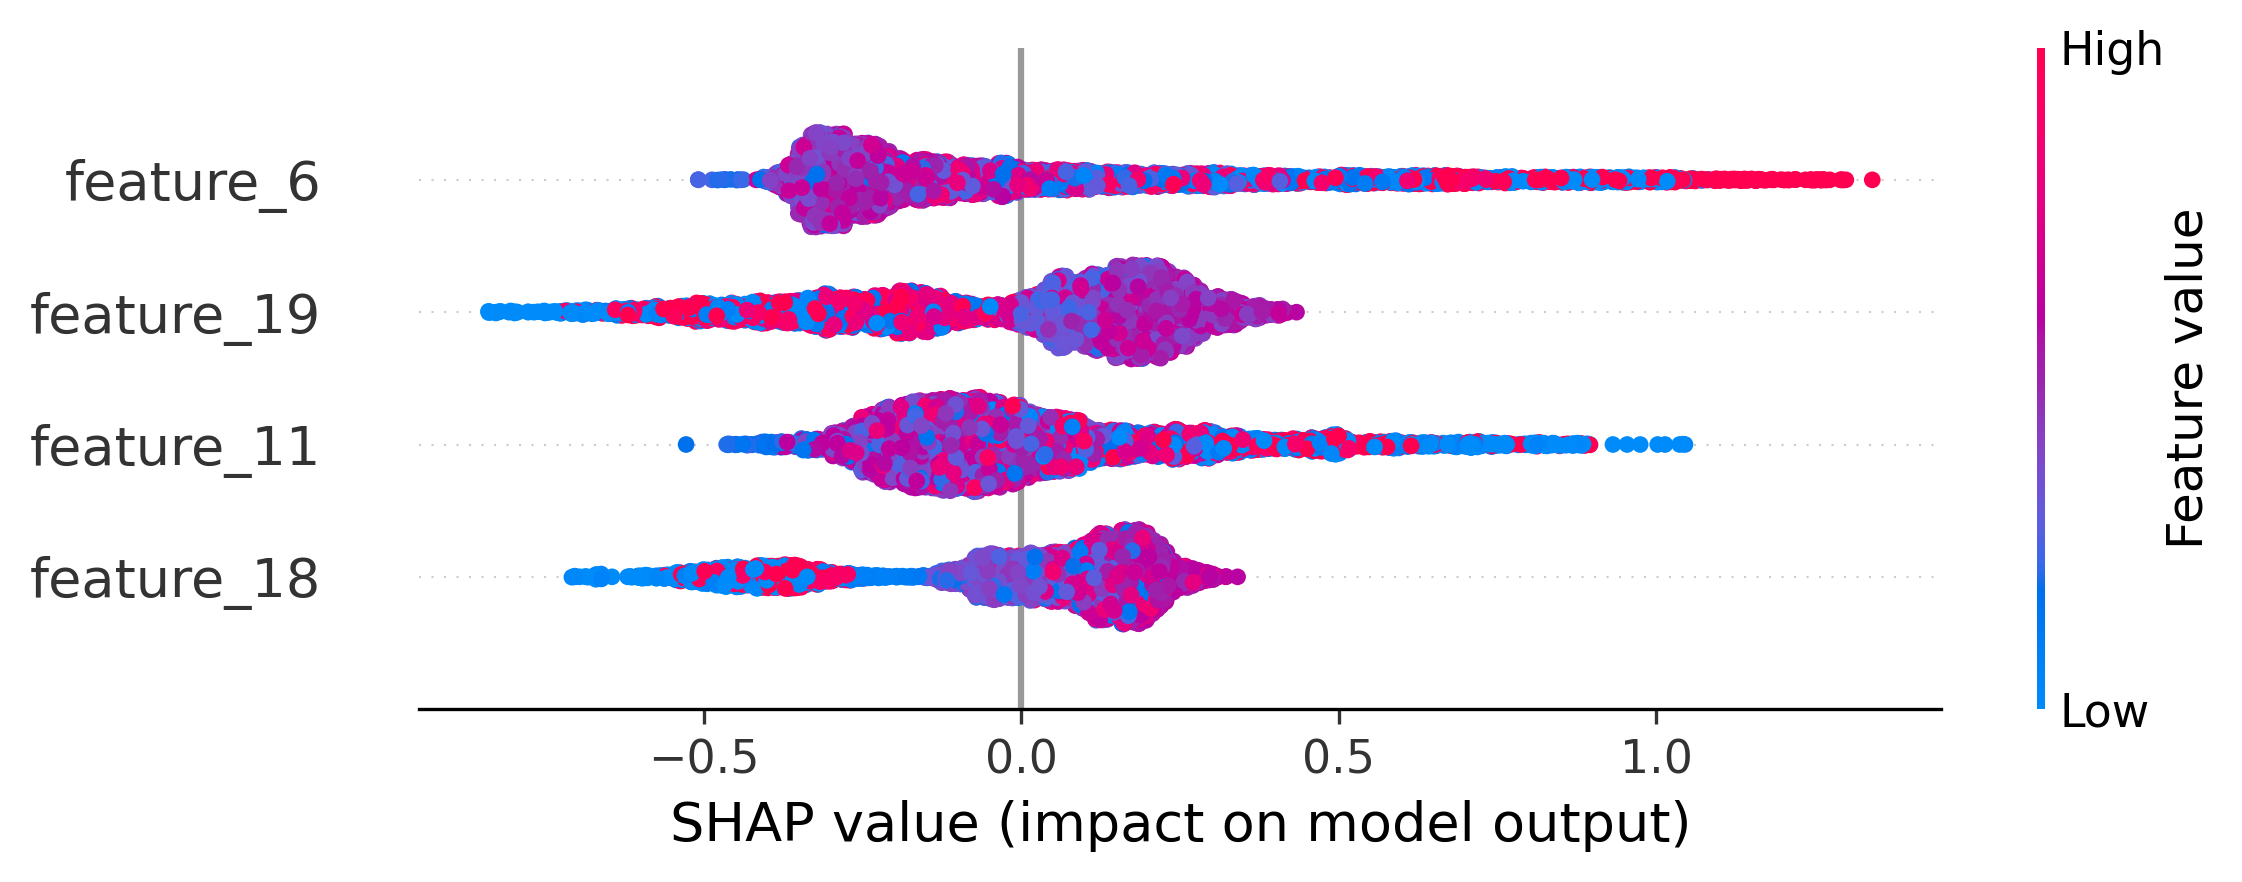

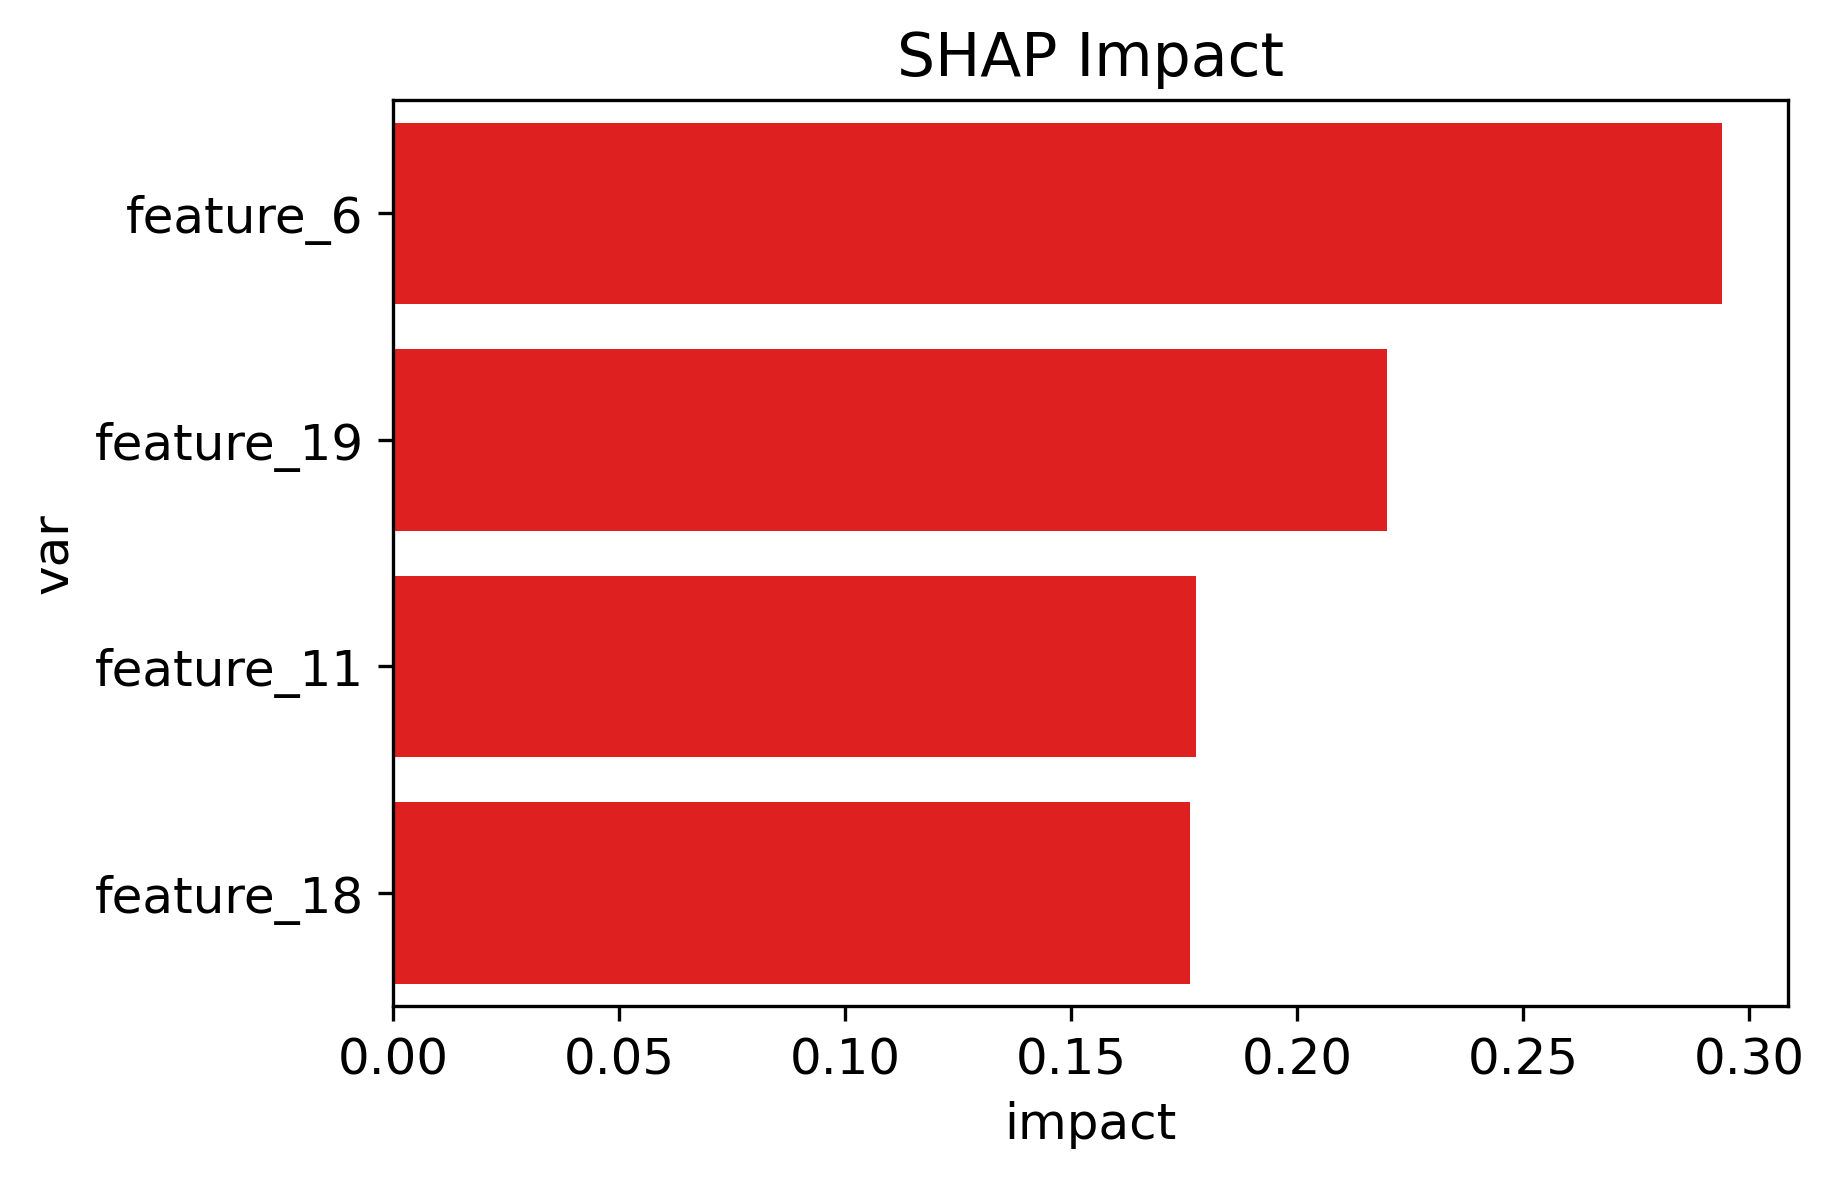

In [20]:
model_.run_pipe()

In [21]:
model_.params

{'learning_rate': 0.018882759291175985,
 'n_estimators': 300,
 'num_leaves': 11,
 'max_depth': 9,
 'min_child_samples': 420,
 'min_child_weight': 4.5881026137266225,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'colsample_bytree': 0.8309739932773642,
 'subsample': 0.6098936448040793,
 'min_split_gain': 0.013797231221701723}

### forward seleção

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'sexo', 'flag', 'feature_0_quadrado']


[22:43:41] |Preprocess| total constant features dropped: 1                                       ]8;id=778063;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=865937;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#454\454]8;;\

[22:43:42] |Preprocess| total correlated features dropped: 1                                     ]8;id=375250;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=446500;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#472\472]8;;\

           --> Parameters select                                                                 ]8;id=433503;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=413768;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#116\116]8;;\

|Iteration 3| New parameters found - AUC of 0.6720 (0.6619)

|Iteration 7| New parameters found - AUC of 0.7317 (0.7181)

selected parameters: {'learning_rate': 0.02946977340945547, 'n_estimators': 200, 'num_leaves': 93, 'max_depth': 7, 
'min_child_samples': 225, 'min_child_weight': 100.75451819368996, 'boosting_type': 'gbdt', 'objective': 'binary', 
'colsample_bytree': 0.924636742894222, 'subsample': 0.8610321205973507, 'min_split_gain': 0.05806621587014044}

[22:44:37] --> Fit model                                                                         ]8;id=823876;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=52226;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#153\153]8;;\

[22:44:38] --> Performance                                                                       ]8;id=771091;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=316082;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#173\173]8;;\

AUC train: 0.8232

AUC test: 0.7711

KS train: 48.20

KS test: 41.02

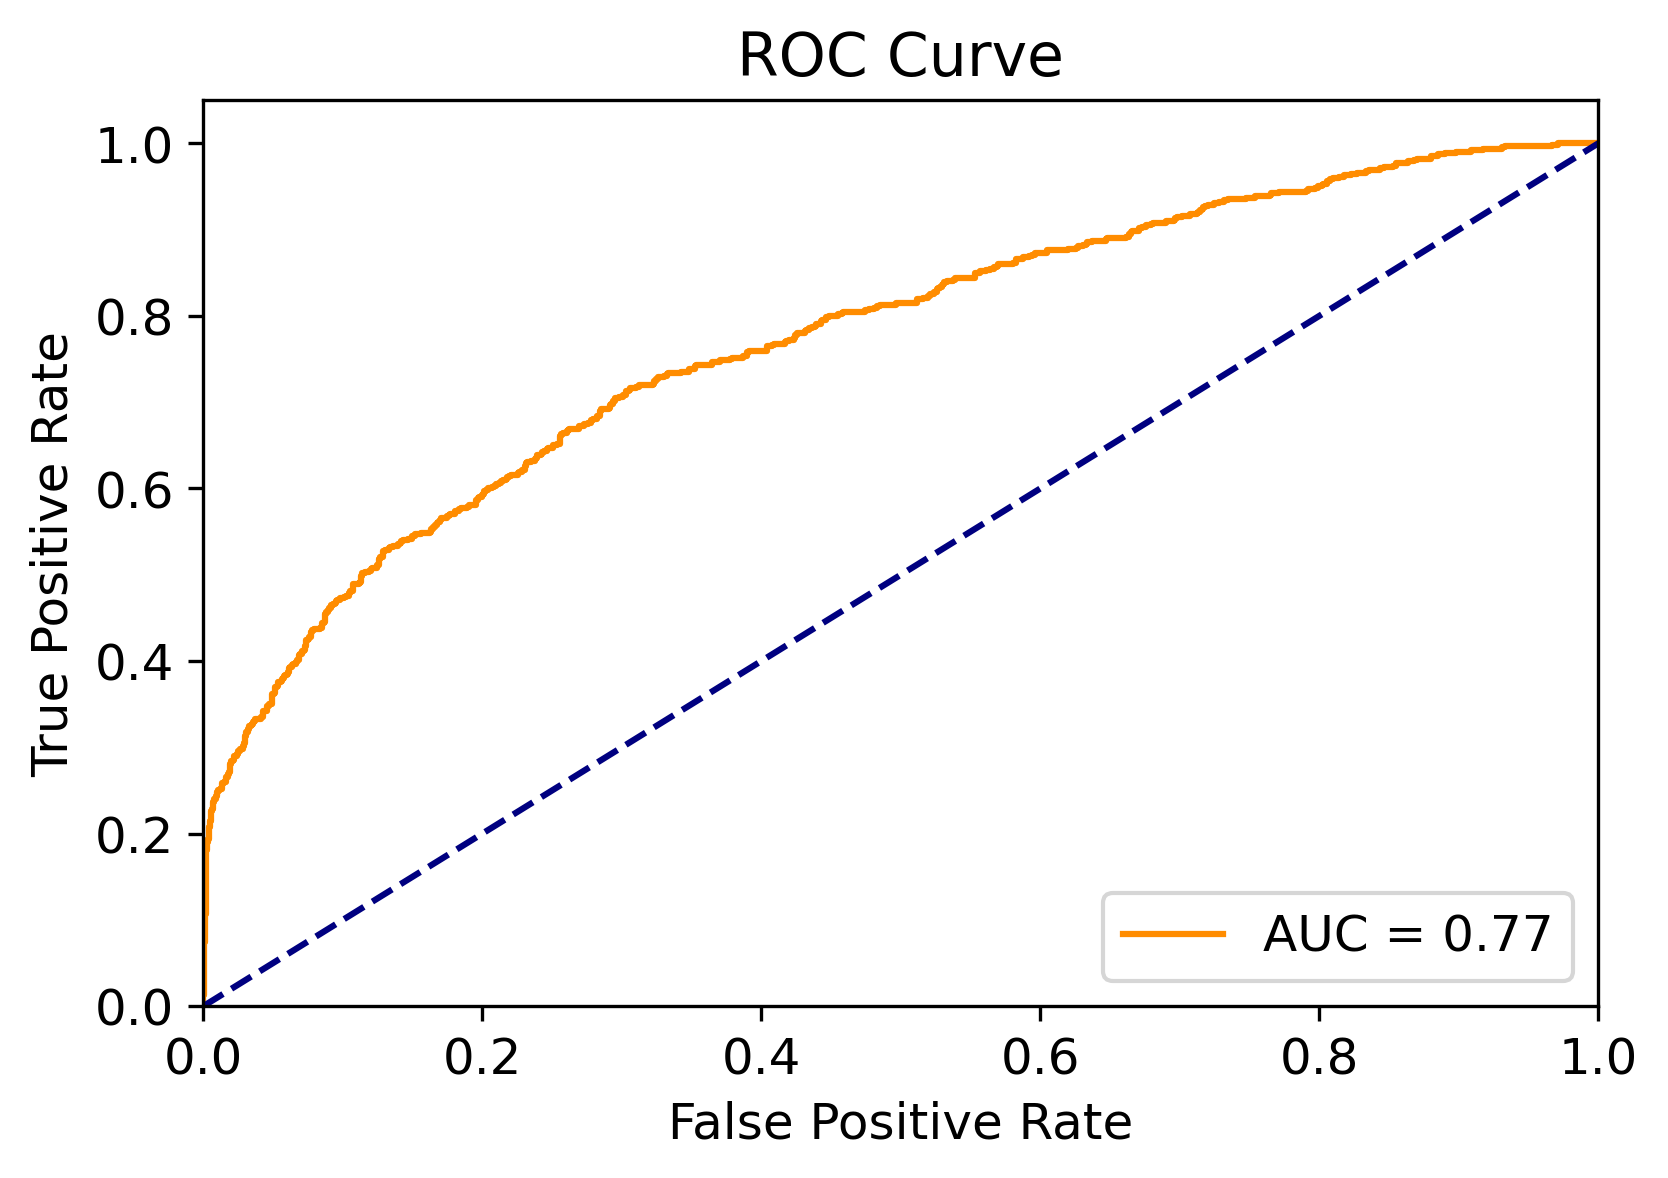

           --> Feature Importance                                                                ]8;id=109855;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=624418;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#191\191]8;;\

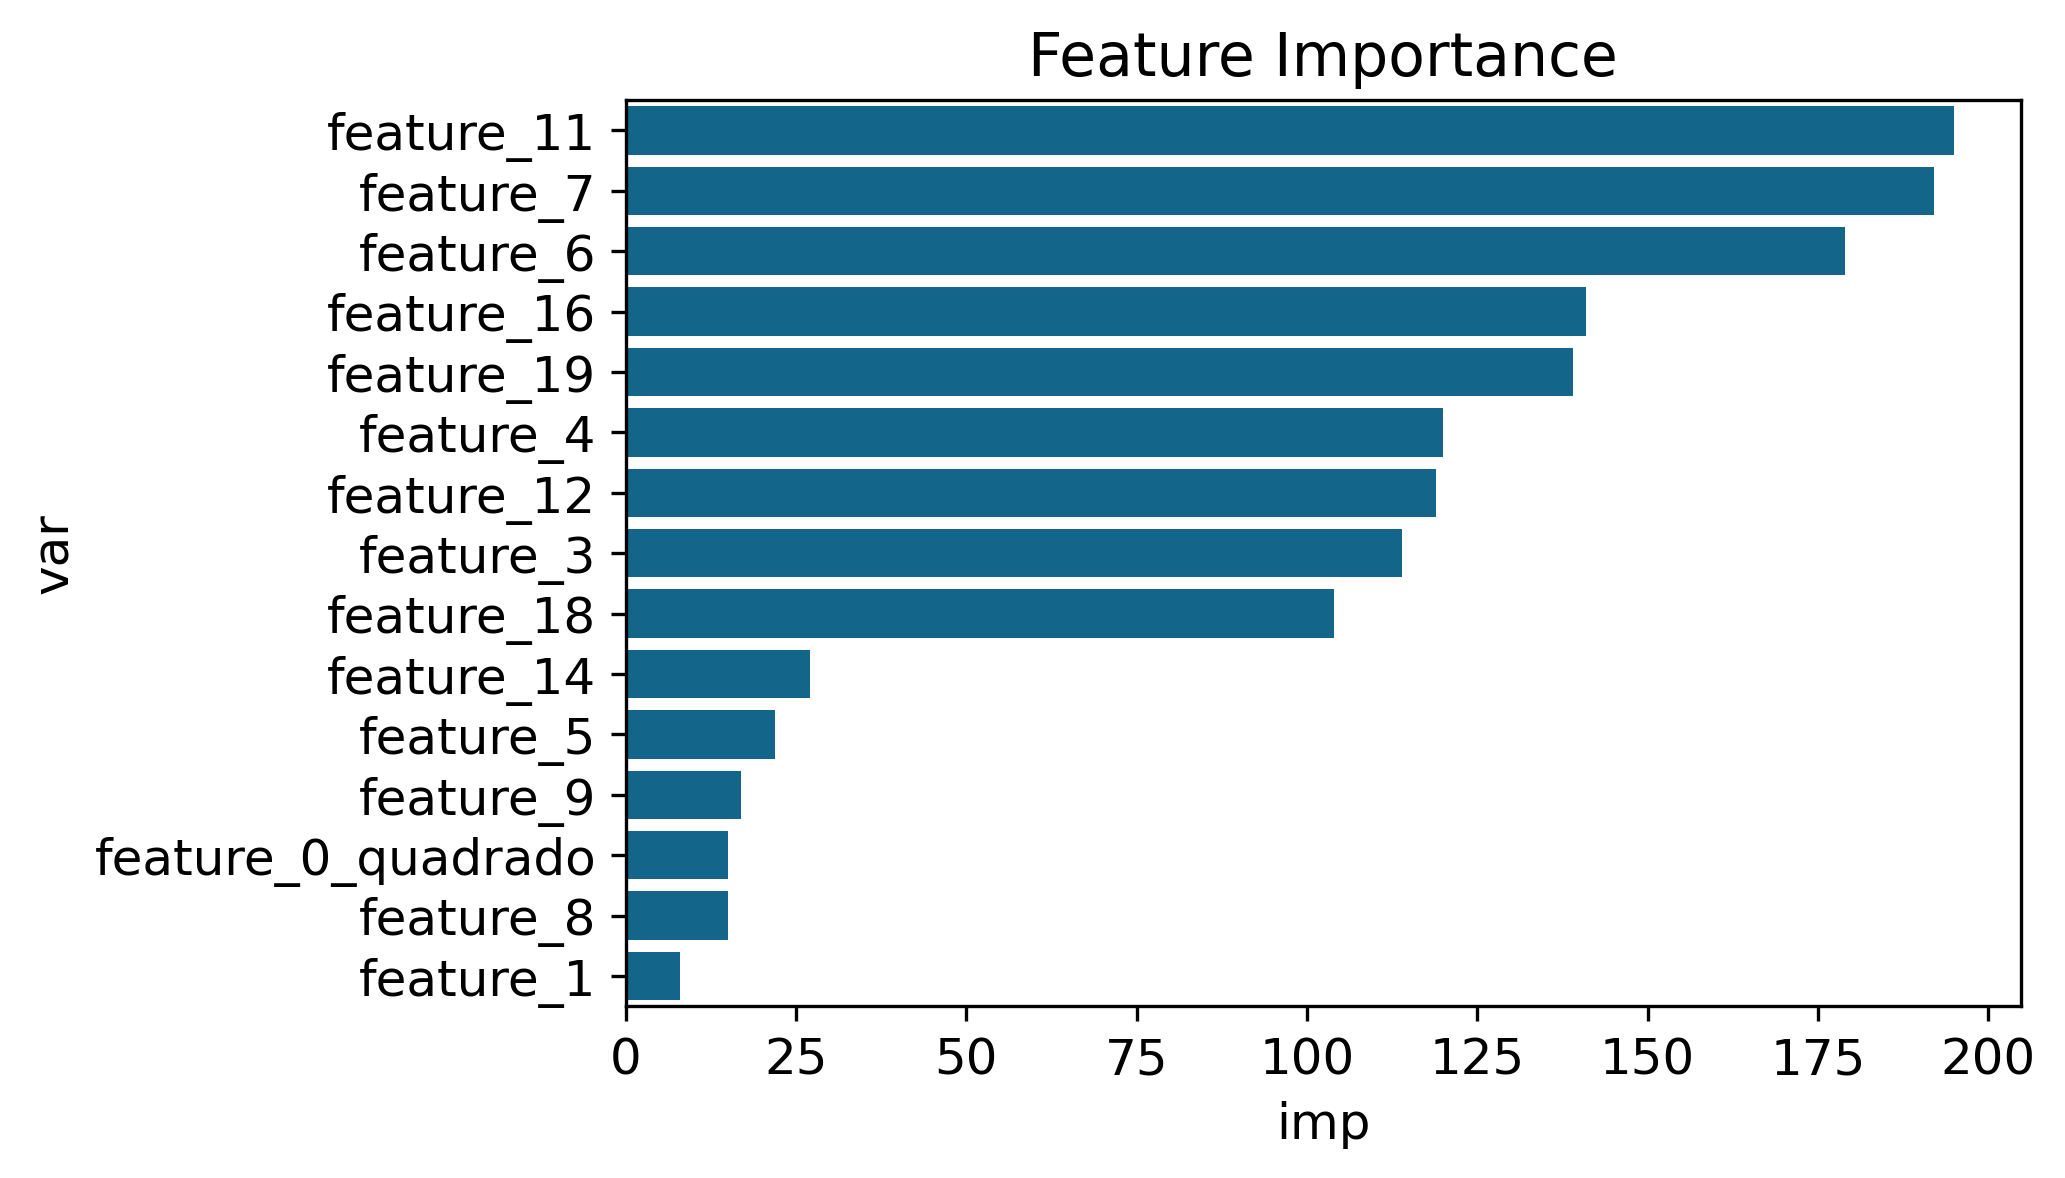

           --> Shap Explainer                                                                    ]8;id=391566;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=975957;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#200\200]8;;\

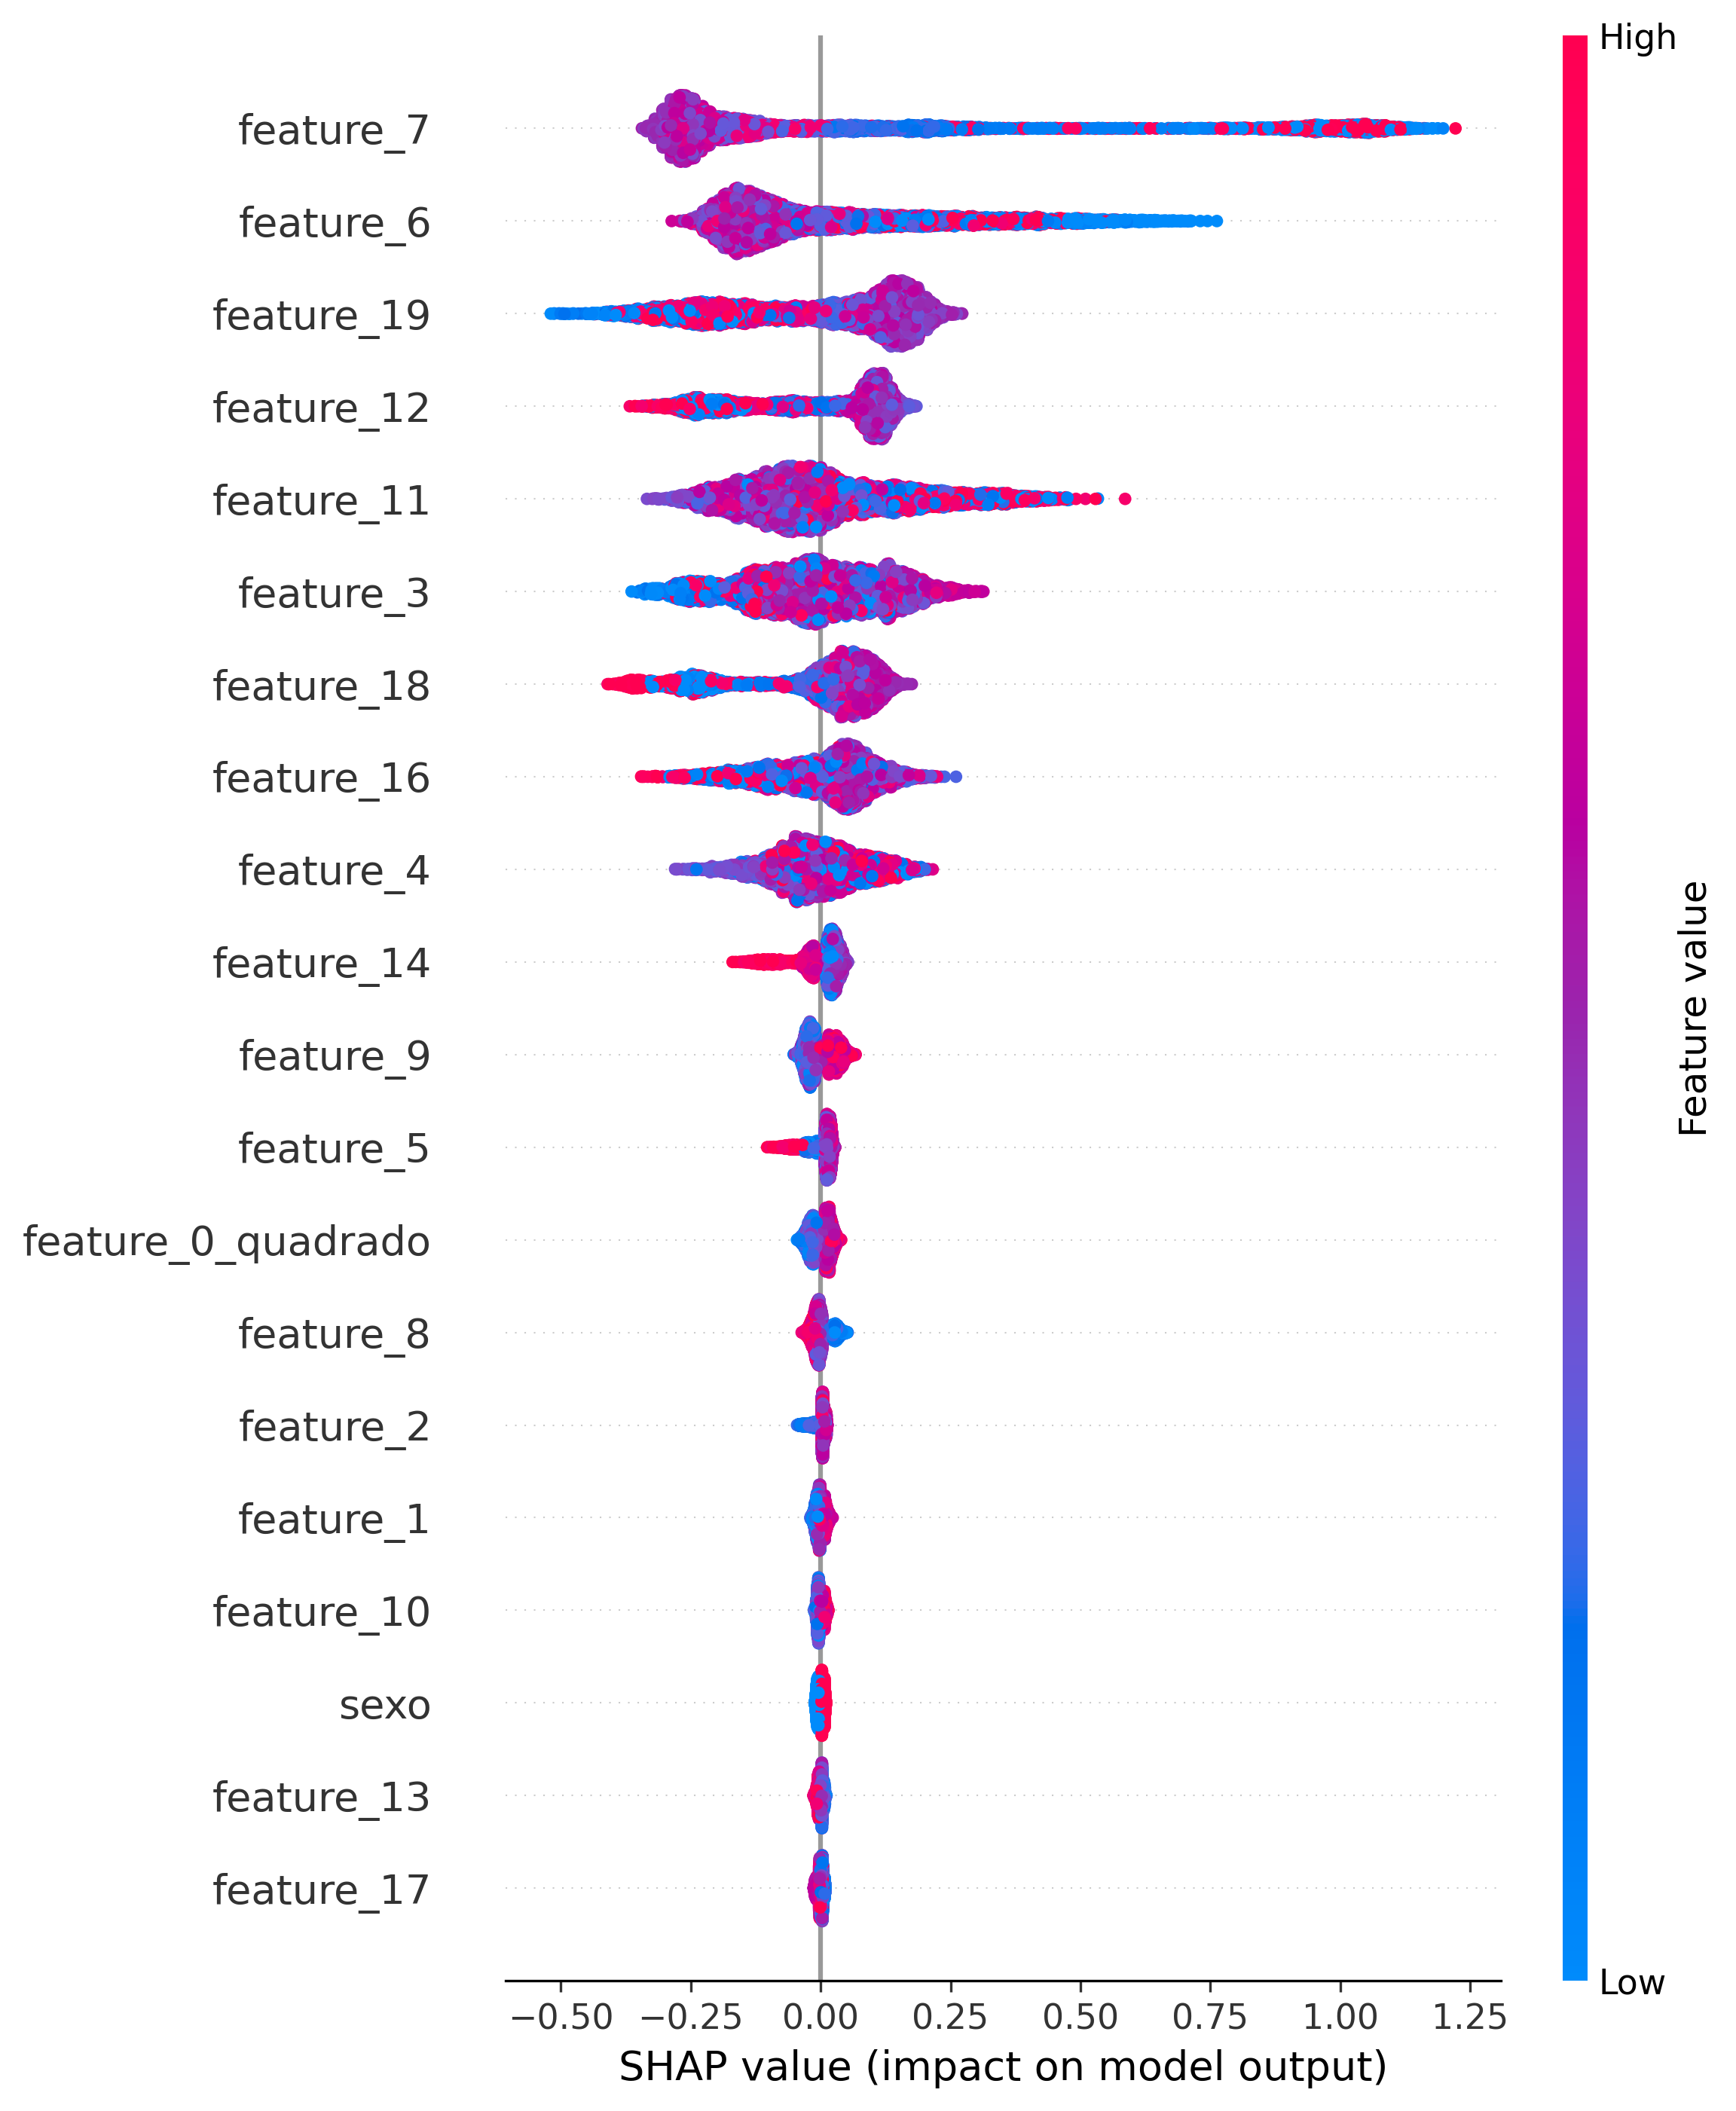

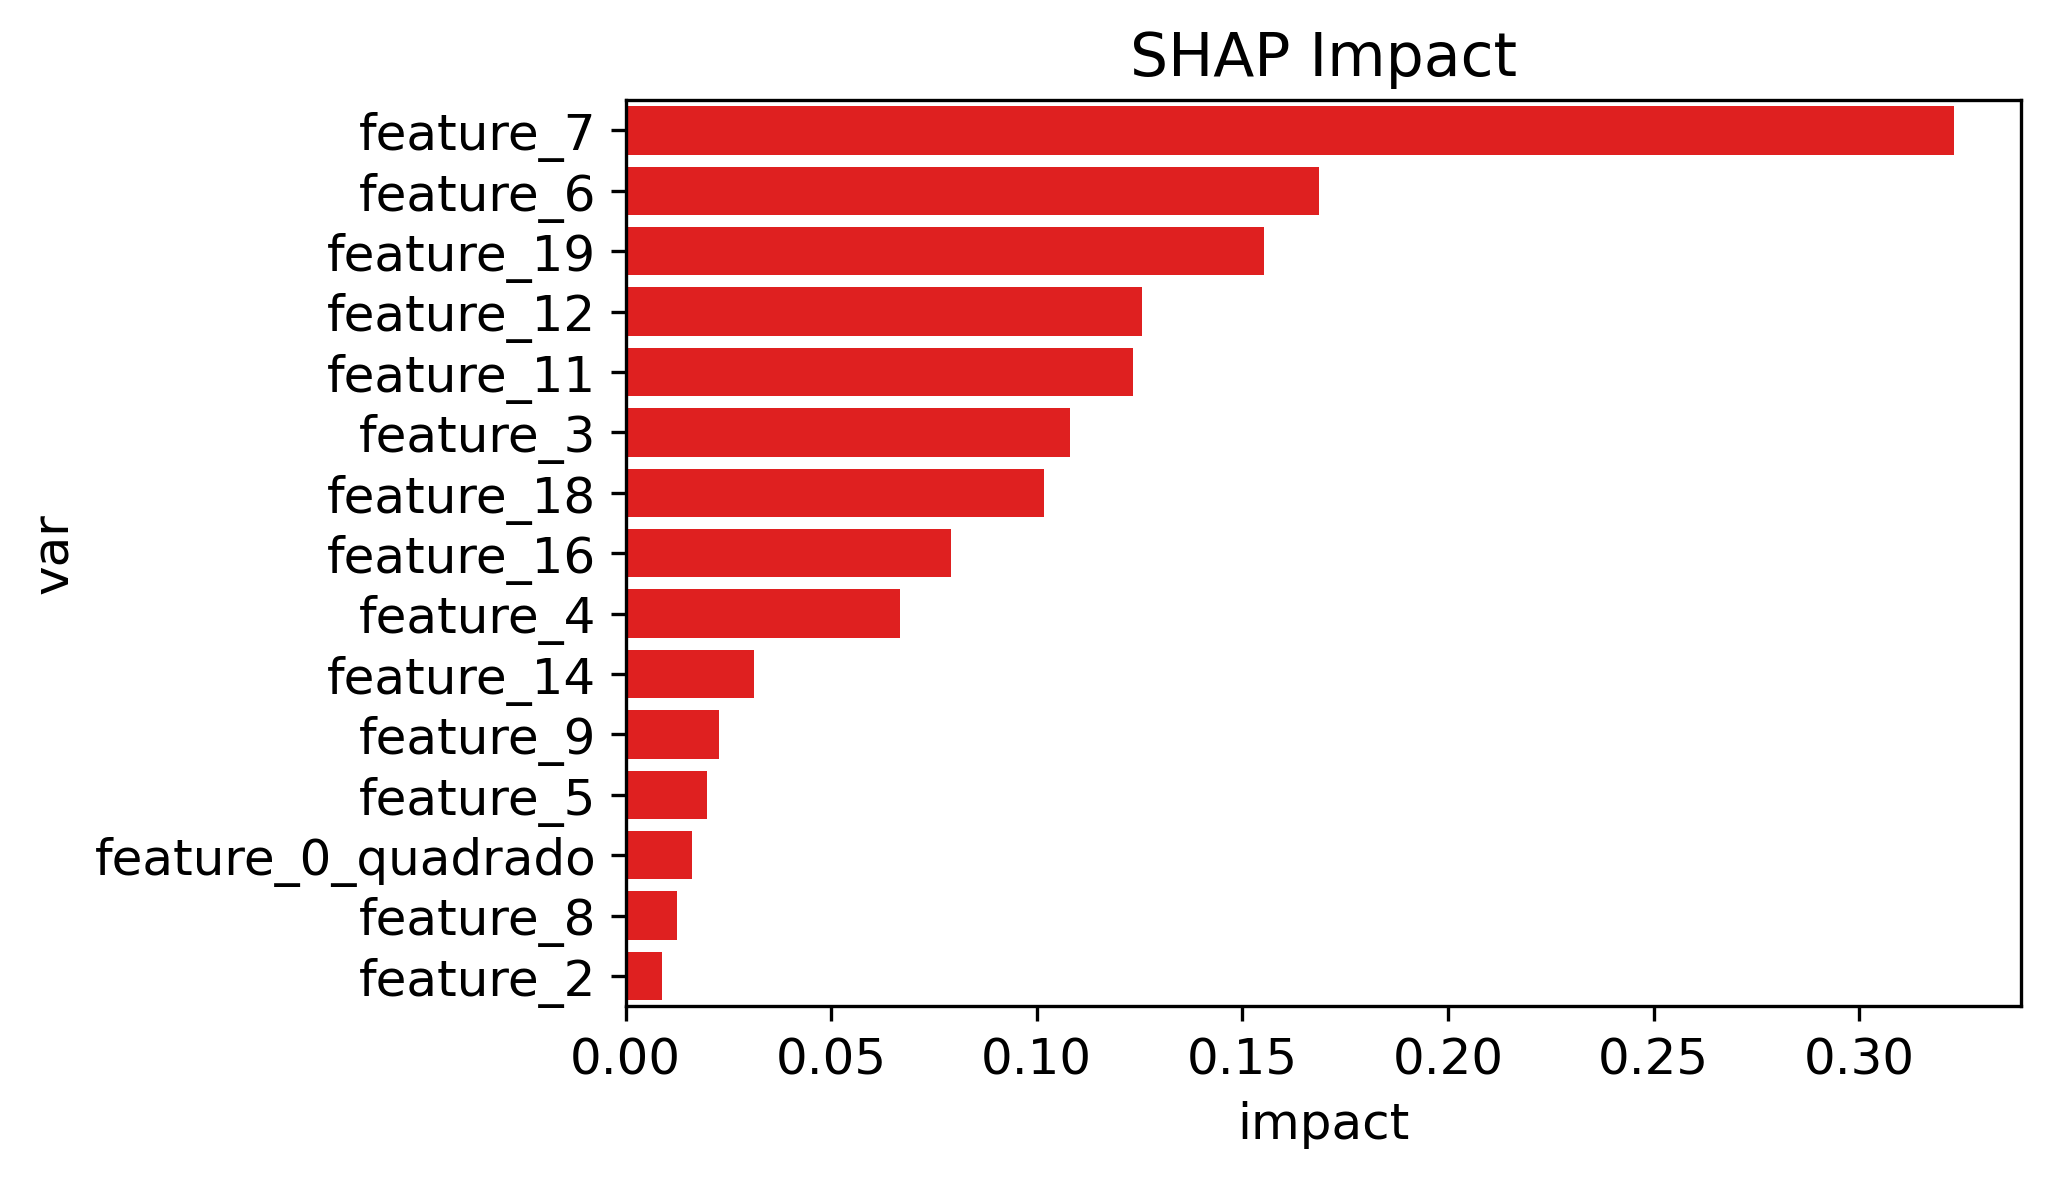

In [23]:
model_ = MasalaPipe(
    data=df,
    id_label="id",
    features=new_features_names,
    target=target,
    categorical_features=["sexo", "flag"],
    col_safra=None,
    test_size=0.3,
    niter=25,
    metric_eval="AUC",
    metric_method="default",
    thr_train_test=0.07,
    correlation_tol=0.85,
    constant_tol=0.95,
    early_stopping_rounds=10,
    eval_features=False,
    filename_storage="forward_select",
    save_in_txt=False,
    rank_count=True,
    params_test=None,
)
print(model_.features)
model_.preprocess()
model_.run_pipe()

In [24]:
features_sel = model_.forward_features_select(
    X_train=model_.X_train,
    params=model_.params,
    imp_df=model_.shap_df,
    target=target,
    categorical_features=model_.categorical_features,
    k_folds=5,
    rank_count=True,
)

[22:45:16] |Features select| forward features select                                             ]8;id=747367;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=8934;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#290\290]8;;\

Best Feature: feature_7 AUC =  0.604314094387755 +/-  0.021819860478345093

Output()

[2/21] Feature add: feature_6 AUC =  0.6327793367346938 +/-  0.019403286279002816

[3/21] Feature add: feature_19 AUC =  0.663438775510204 +/-  0.0086304828262219

[4/21] Feature add: feature_12 AUC =  0.6705111607142857 +/-  0.012971353275520825

[5/21] Feature add: feature_11 AUC =  0.6935711096938776 +/-  0.014417767316297939

[6/21] Feature add: feature_3 AUC =  0.719938137755102 +/-  0.01190849217154979

[7/21] Feature add: feature_18 AUC =  0.7204779974489796 +/-  0.013036466816573536

[8/21] Feature add: feature_16 AUC =  0.7303160076530613 +/-  0.014235012122932834

[9/21] Feature add: feature_4 AUC =  0.7441823979591836 +/-  0.015453602683835303

[10/21] Feature no add: feature_14 AUC =  0.7427621173469388 +/-  0.014094064133958965

[11/21] Feature no add: feature_9 AUC =  0.7431479591836735 +/-  0.014690007246321229

[12/21] Feature no add: feature_5 AUC =  0.7434397321428572 +/-  0.012626870713868704

[13/21] Feature no add: feature_0_quadrado AUC =  0.7441747448979592 +/-  0.015280420484629941

[14/21] Feature no add: feature_8 AUC =  0.7409815051020407 +/-  0.011030556944504135

[15/21] Feature add: feature_2 AUC =  0.7448912627551021 +/-  0.013940409413861125

[16/21] Feature no add: feature_1 AUC =  0.7445251913265306 +/-  0.011761640257164096

[17/21] Feature no add: feature_10 AUC =  0.743561543367347 +/-  0.01178098911926667

[18/21] Feature no add: sexo AUC =  0.7445685586734694 +/-  0.014367172622330936

[19/21] Feature no add: feature_13 AUC =  0.7440178571428572 +/-  0.014201306588544826

[20/21] Feature no add: feature_17 AUC =  0.7436074617346939 +/-  0.012428325739236775

[21/21] Feature add: feature_15 AUC =  0.7465500637755103 +/-  0.01286075306912059

[22:45:46] Total selected features: 11                                                           ]8;id=132925;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=336780;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#415\415]8;;\

In [25]:
features_sel

['feature_7',
 'feature_6',
 'feature_19',
 'feature_12',
 'feature_11',
 'feature_3',
 'feature_18',
 'feature_16',
 'feature_4',
 'feature_2',
 'feature_15']

['feature_7', 'feature_6', 'feature_19', 'feature_12', 'feature_11', 'feature_3', 'feature_18', 'feature_16', 'feature_4', 'feature_2', 'feature_15']


[22:47:35] |Preprocess| total constant features dropped: 0                                       ]8;id=41501;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=48559;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#454\454]8;;\

           |Preprocess| total correlated features dropped: 0                                     ]8;id=600988;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=919926;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#472\472]8;;\

           --> Parameters select                                                                 ]8;id=50744;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=376962;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#116\116]8;;\

|Iteration 1| New parameters found - AUC of 0.7164 (0.7105)

|Iteration 14| New parameters found - AUC of 0.7838 (0.7763)

selected parameters: {'learning_rate': 0.1481651589261737, 'n_estimators': 800, 'num_leaves': 101, 'max_depth': 9, 
'min_child_samples': 165, 'min_child_weight': 208.8205886288221, 'boosting_type': 'gbdt', 'objective': 'binary', 
'colsample_bytree': 0.42090898339867316, 'subsample': 0.5466394009419766, 'min_split_gain': 0.09781936316243171}

[22:49:26] --> Fit model                                                                         ]8;id=149714;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=450885;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#153\153]8;;\

           --> Performance                                                                       ]8;id=769199;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=453545;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#173\173]8;;\

AUC train: 0.8708

AUC test: 0.8016

KS train: 56.84

KS test: 44.14

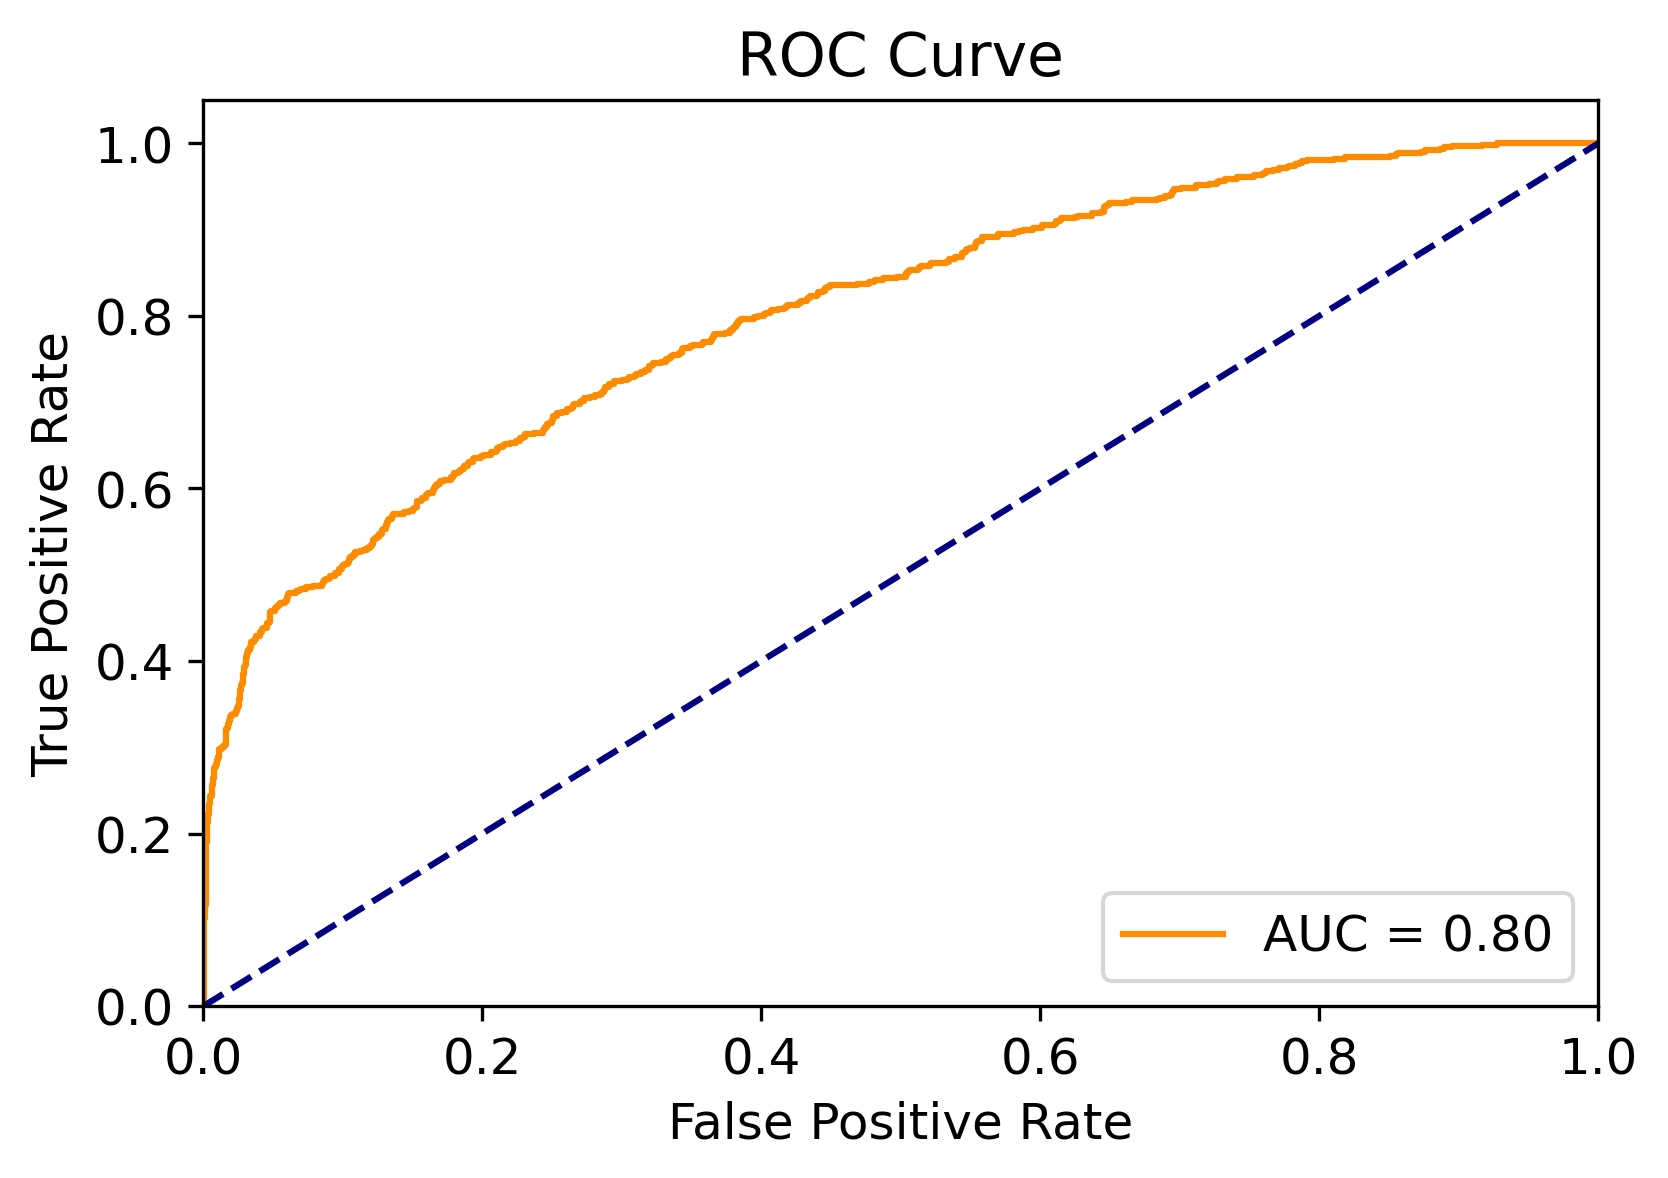

           --> Feature Importance                                                                ]8;id=748323;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=40438;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#191\191]8;;\

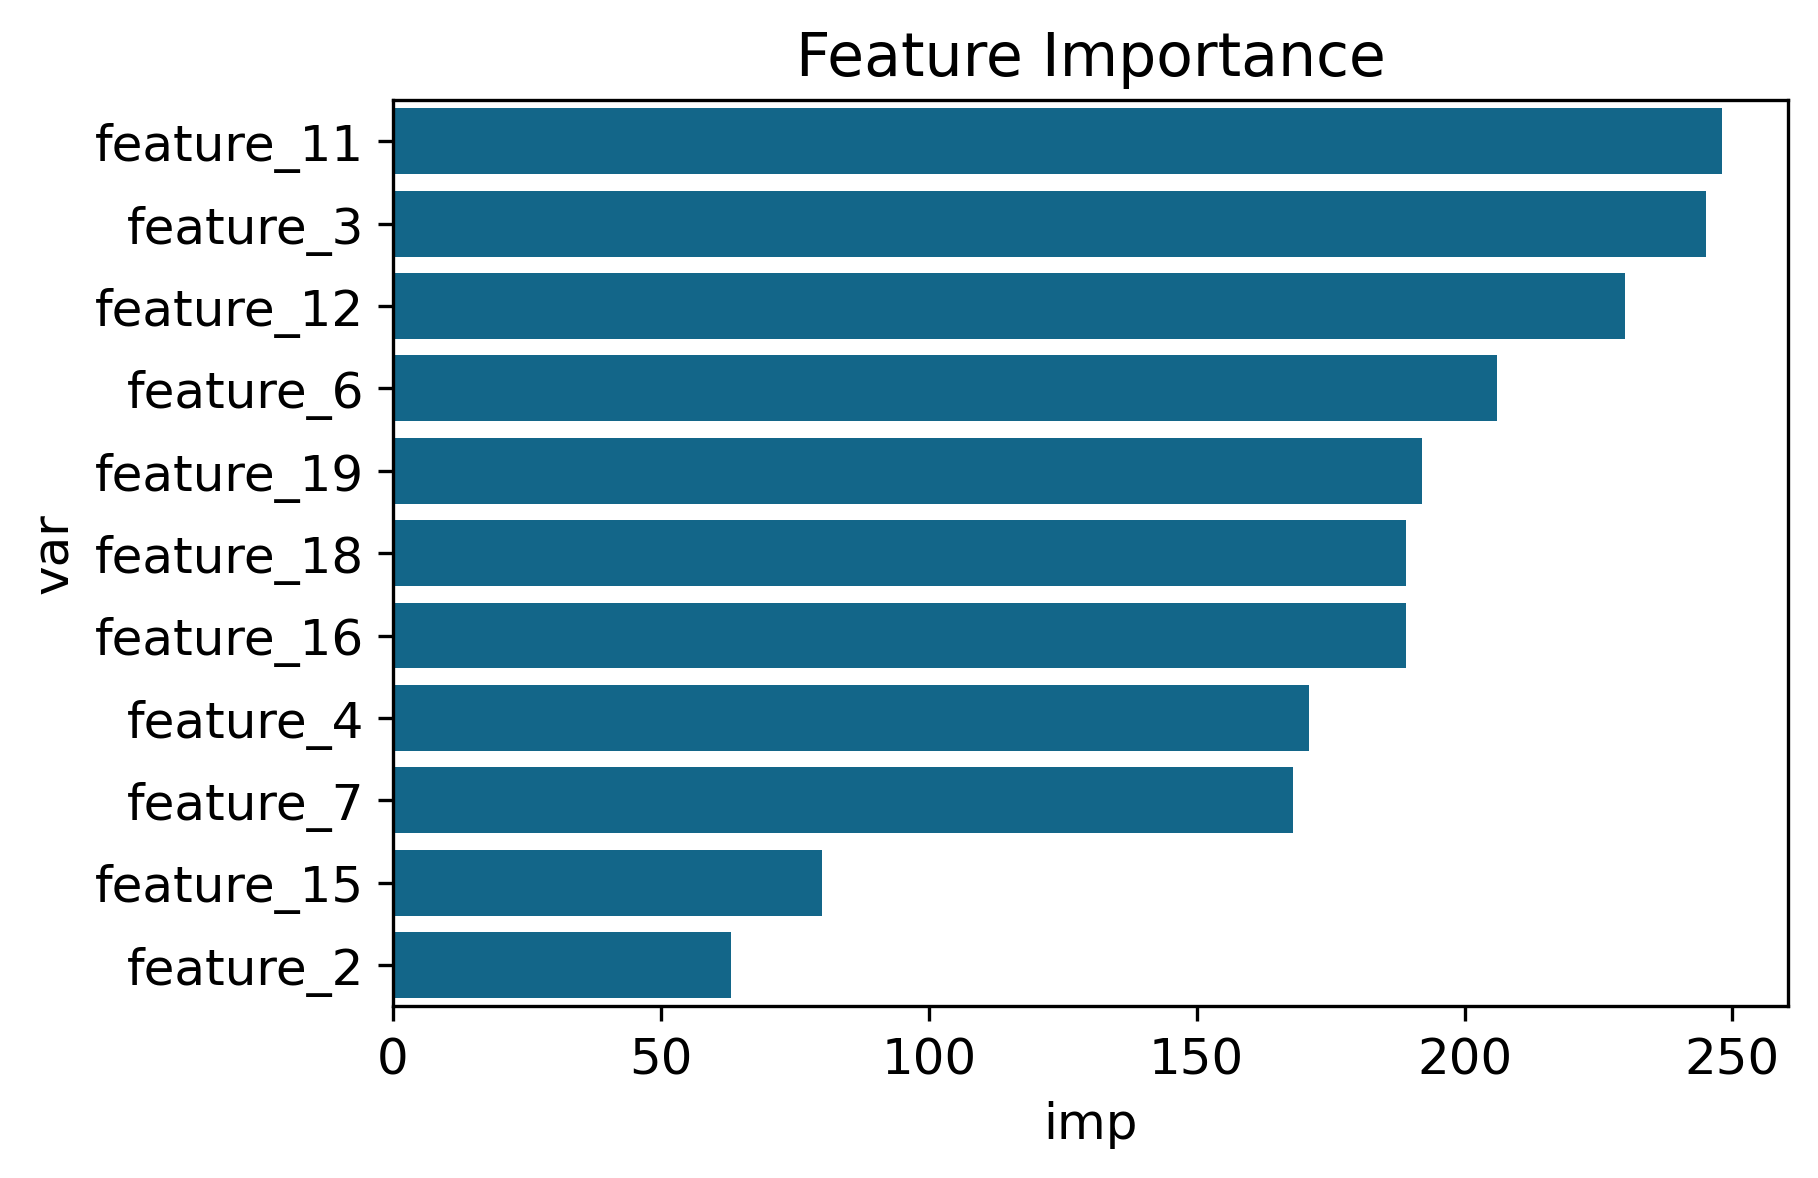

[22:49:27] --> Shap Explainer                                                                    ]8;id=183435;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py\masala_pipe.py]8;;\:]8;id=86700;file:///home/giovane/Documents/Datarisk/script_modelagem/MasalaPipe/masala_pipe.py#200\200]8;;\

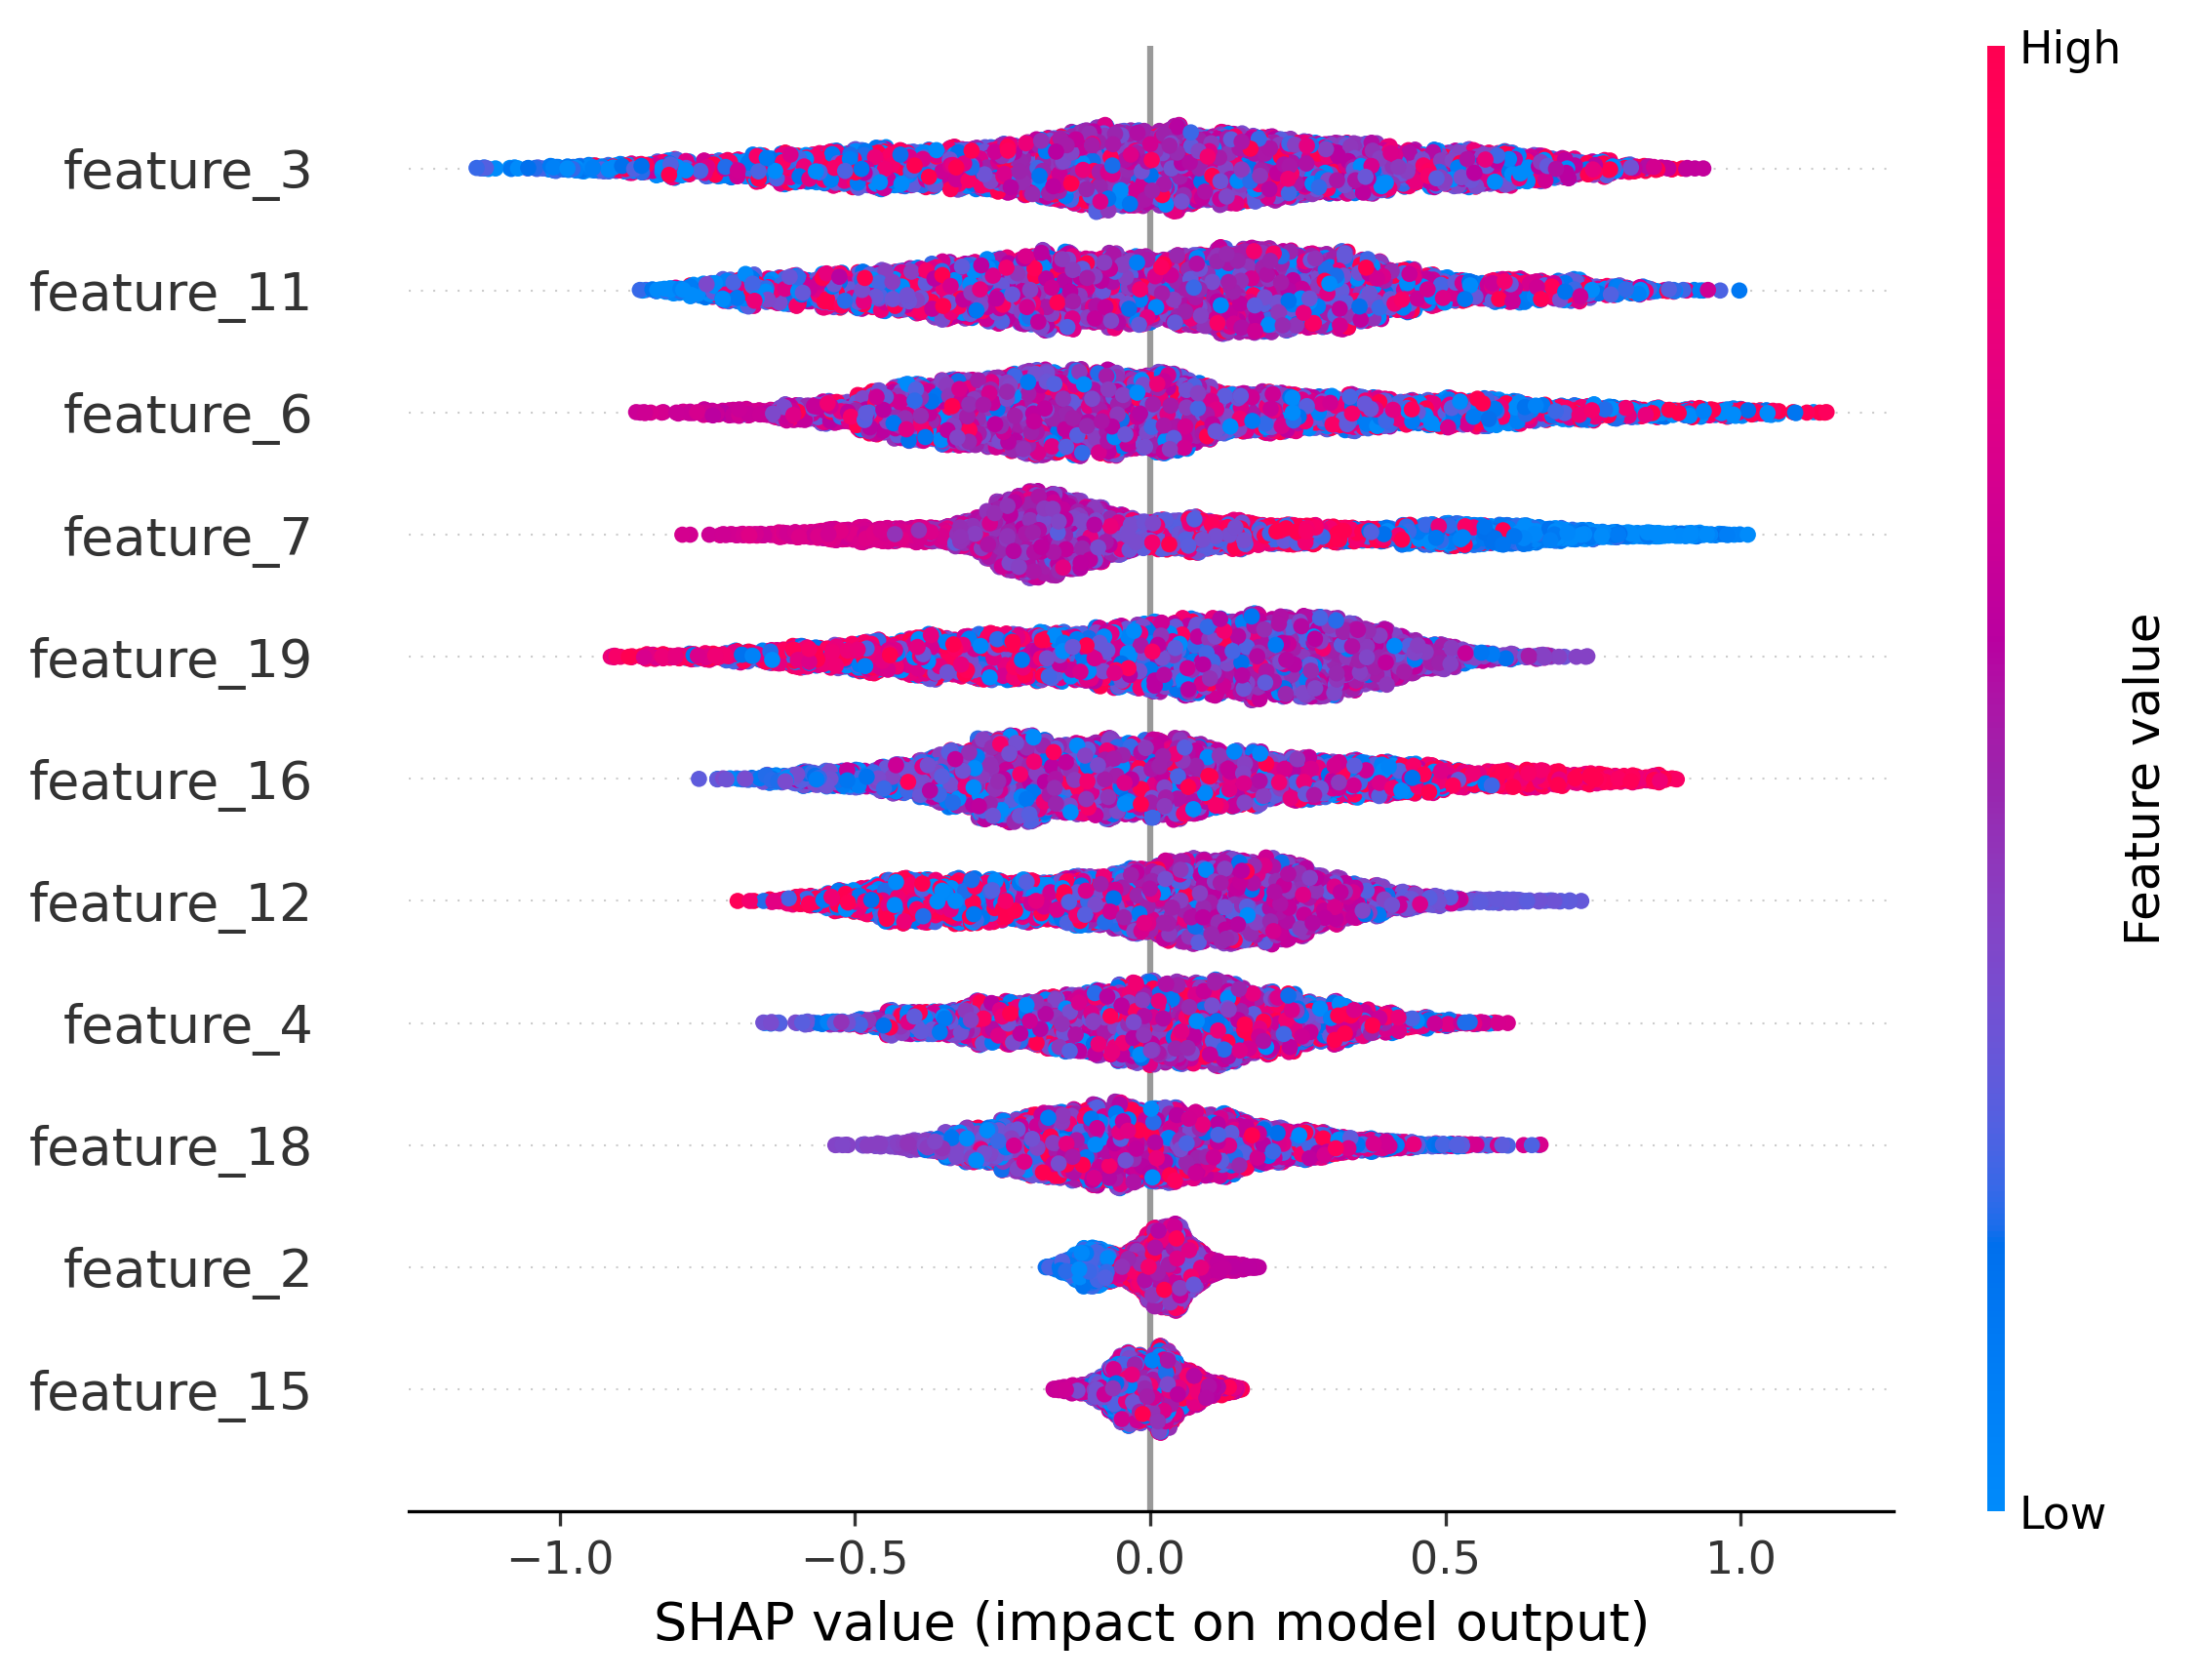

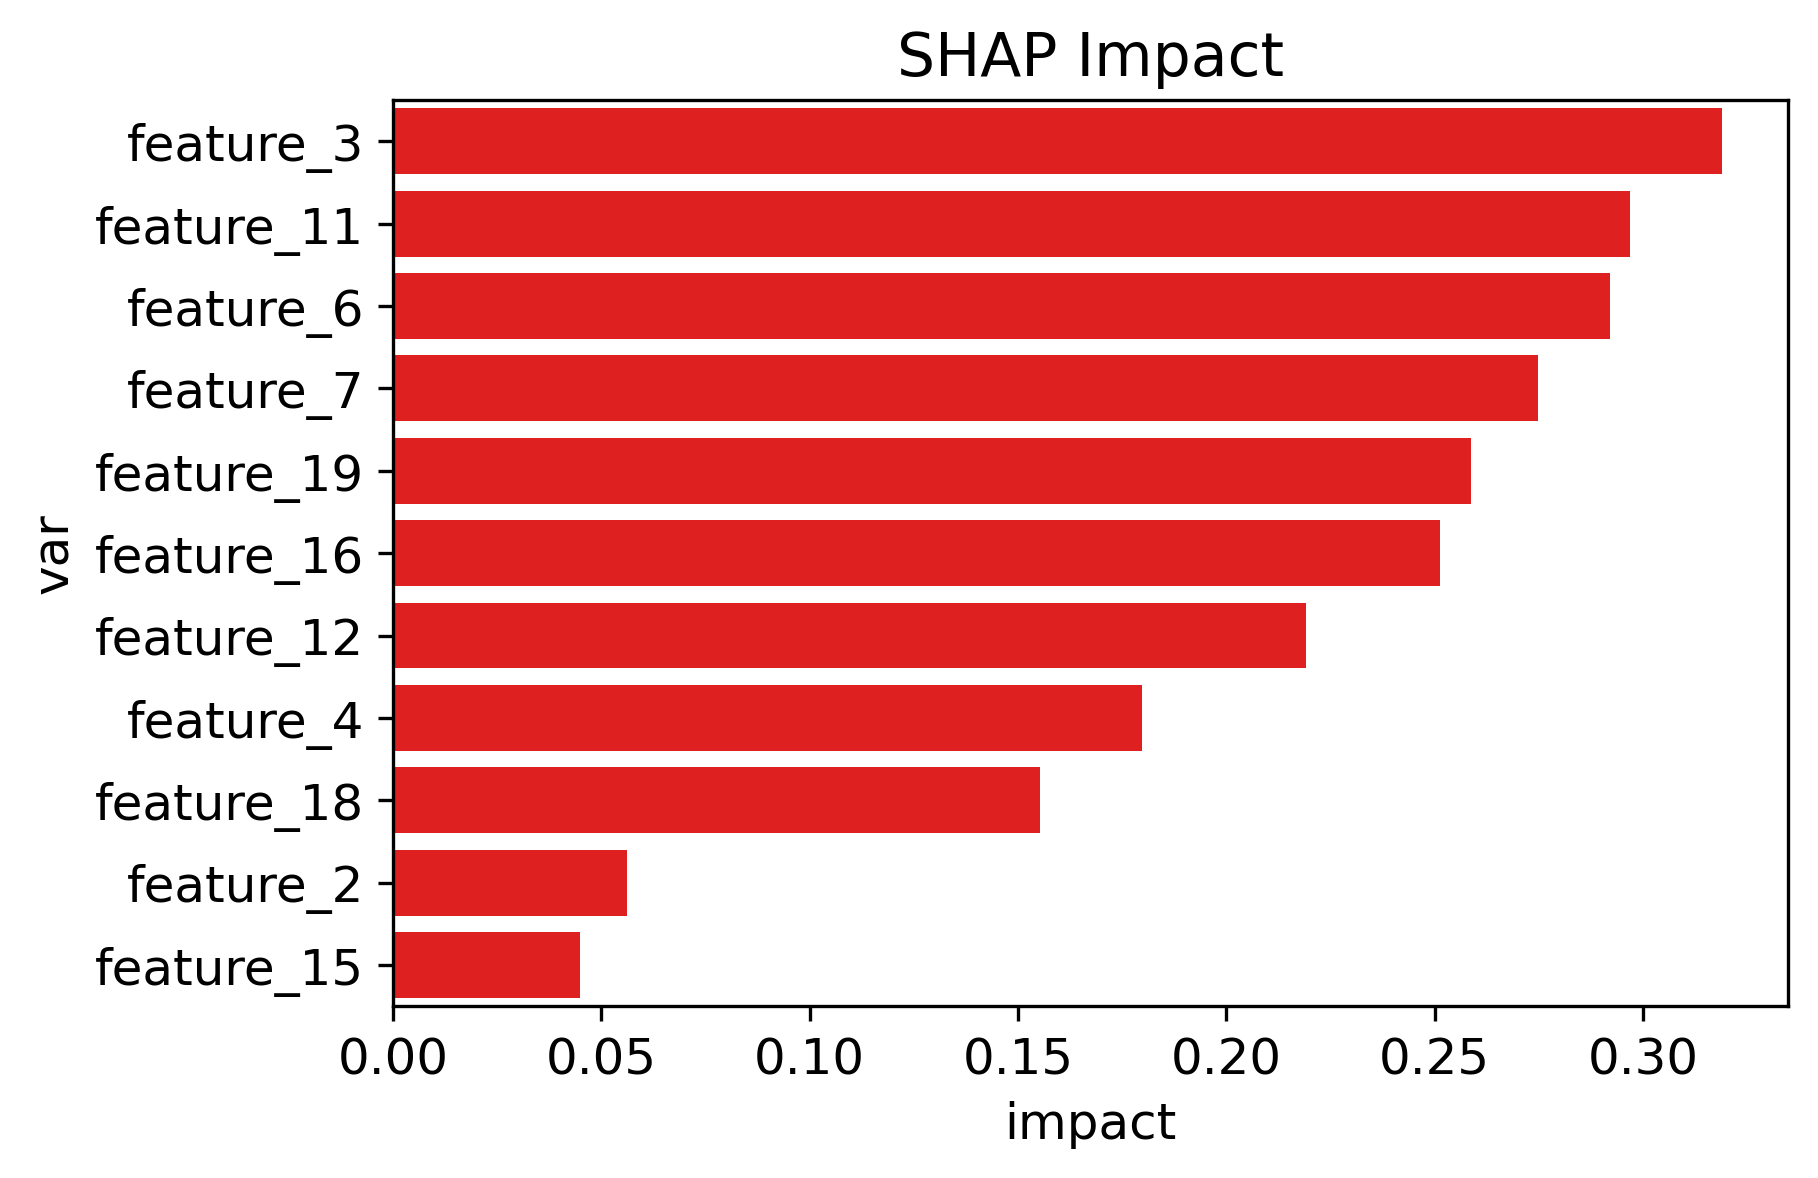

In [27]:
model_ = MasalaPipe(
    data=df,
    id_label="id",
    features=features_sel,
    target=target,
    categorical_features=[],
    col_safra=None,
    test_size=0.3,
    niter=25,
    metric_eval="AUC",
    metric_method="default",
    thr_train_test=0.07,
    correlation_tol=0.85,
    constant_tol=0.95,
    early_stopping_rounds=15,
    eval_features=False,
    filename_storage="forward_select_p2",
    save_in_txt=False,
    rank_count=True,
    params_test=None,
)
print(model_.features)
model_.preprocess()
model_.run_pipe()

In [28]:
model_.features

['feature_7',
 'feature_6',
 'feature_19',
 'feature_12',
 'feature_11',
 'feature_3',
 'feature_18',
 'feature_16',
 'feature_4',
 'feature_2',
 'feature_15']

In [29]:
model_.get_preds(df)

array([0.07262602, 0.06386371, 0.04215056, ..., 0.19201759, 0.19161777,
       0.17157938])

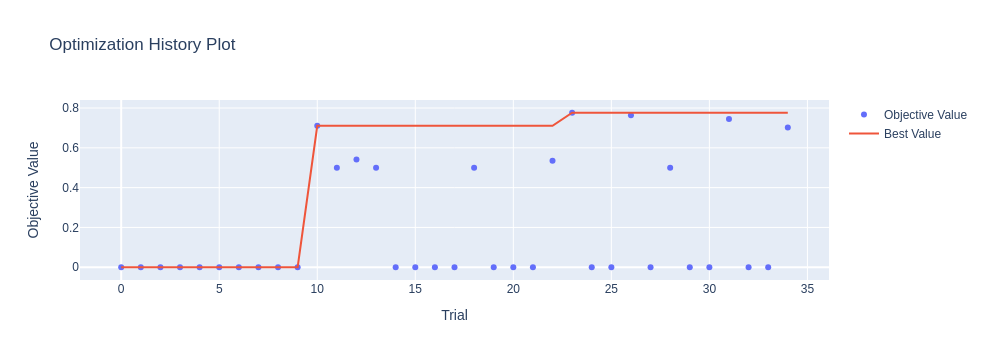

In [30]:
optuna.visualization.plot_optimization_history(model_.study)

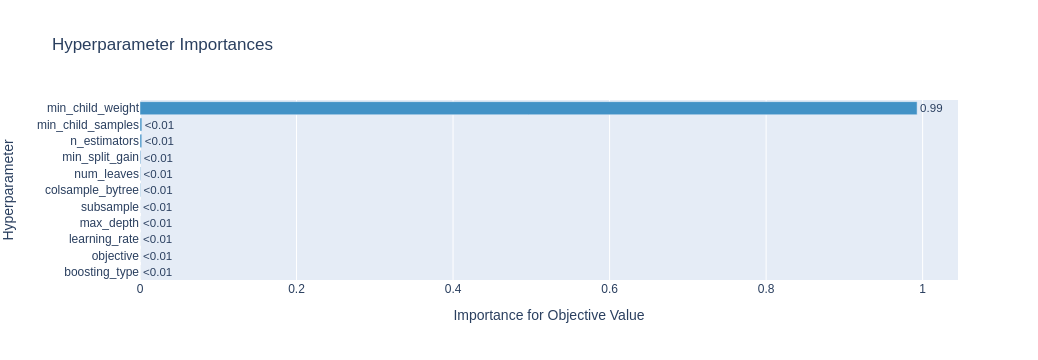

In [31]:
optuna.visualization.plot_param_importances(model_.study)